<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install --upgrade --force-reinstall --no-deps kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidlealo","key":"fbe663a379392d0c356f5869d9d6cebd"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle models list

Next Page Token = CfDJ8EjpvNnYgNtGoWS2kk3rGCLFU7YrxgwMjxvt2Ozpz2f9FdX6zWgOsZdZ_5Dd4_31_XAWuJ2XC4banPOzJr5O9NM
    id  ref                                  title                     subtitle                                                                                                                                                                                                                                                  author          
------  -----------------------------------  ------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------  
446705  qwen-lm/qwen3-next-80b               Qwen3 Next 80B            Qwen3-Next-80B-A3B is the first installment in the Qwen3-Next series and features the following key enchancements like Hybrid Attention, High-S

In [7]:
!kaggle datasets list -s mobile-price-classification

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
iabhishekofficial/mobile-price-classification                     Mobile Price Classification                             72340  2018-01-28 08:44:24.237000         235354       2402  0.7058824        
jacksondivakarr/phone-classification-dataset                      Phone Classification Dataset                           210416  2023-12-12 15:21:07.330000           8222         91  1.0              
mbsoroush/mobile-price-range                                      Mobile Price Range                                      72340  2024-07-29 08:05:56.637000           2342         43  1.0          

In [8]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 198MB/s]


In [11]:
!unzip "/content/mobile-price-classification.zip"

Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# Mobile Price Classification Dataset

Este conjunto de datos proviene de [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) y está diseñado para problemas de **clasificación supervisada**.  
El objetivo es predecir el **rango de precio** de un teléfono móvil basado en sus características técnicas.

## Descripción general

- **Número de filas:** 2,000+
- **Número de columnas:** 21
- **Tipo de problema:** Clasificación (rango de precio: 0, 1, 2, 3)
- **Rango de precios:**
  - 0: menos de $100
  - 1: $100–200
  - 2: $200–300
  - 3: más de $300

## Variables

A continuación, se detallan todas las variables del dataset:

- **id**: Identificador único de cada teléfono móvil.
- **battery_power**: Potencia de la batería del teléfono en mAh.
- **blue**: Indica si el teléfono tiene conectividad Bluetooth (1 = sí, 0 = no).
- **clock_speed**: Velocidad del procesador en GHz.
- **dual_sim**: Indica si el teléfono soporta Dual SIM (1 = sí, 0 = no).
- **fc**: Resolución de la cámara frontal en megapíxeles.
- **four_g**: Indica si el teléfono soporta red 4G (1 = sí, 0 = no).
- **int_memory**: Memoria interna del teléfono en GB.
- **m_dep**: Profundidad del teléfono (thickness) en cm.
- **mobile_wt**: Peso del teléfono en gramos.
- **n_cores**: Número de núcleos del procesador.
- **pc**: Resolución de la cámara principal en megapíxeles.
- **px_height**: Altura de la resolución de la pantalla en píxeles.
- **px_width**: Ancho de la resolución de la pantalla en píxeles.
- **ram**: Memoria RAM en MB.
- **sc_h**: Altura de la pantalla en cm.
- **sc_w**: Ancho de la pantalla en cm.
- **talk_time**: Duración de la batería en horas de conversación.
- **three_g**: Indica si el teléfono soporta red 3G (1 = sí, 0 = no).
- **touch_screen**: Indica si el teléfono tiene pantalla táctil (1 = sí, 0 = no).
- **wifi**: Indica si el teléfono tiene conectividad Wi-Fi (1 = sí, 0 = no).
- **price_range**: Rango de precio del teléfono (0, 1, 2, 3).

## Uso sugerido

Este dataset es ideal para:

- Practicar **modelos de clasificación**: árboles de decisión, Random Forest, SVM, redes neuronales, etc.
- Explorar **ingeniería de características**, escalado de datos y análisis exploratorio.
- Aprender a evaluar modelos con **accuracy**, **F1-score**, **matriz de confusión**, etc.


In [17]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [18]:
df_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [19]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


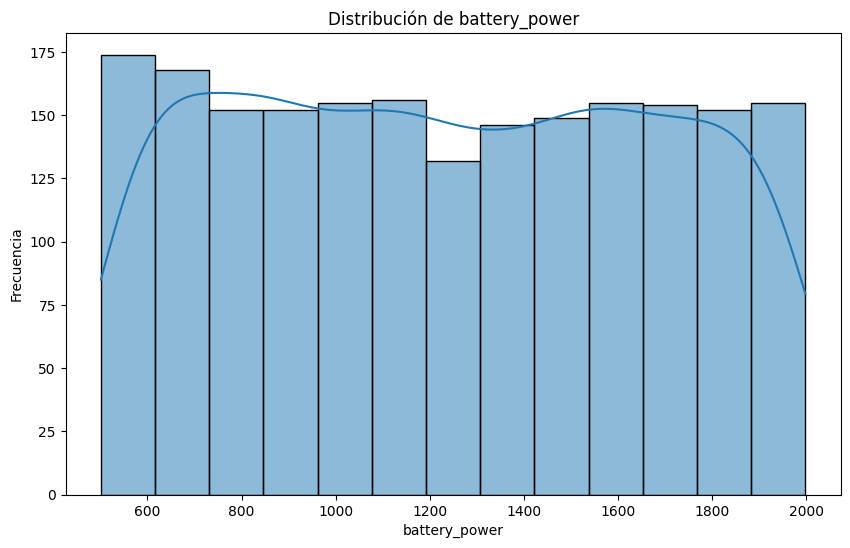

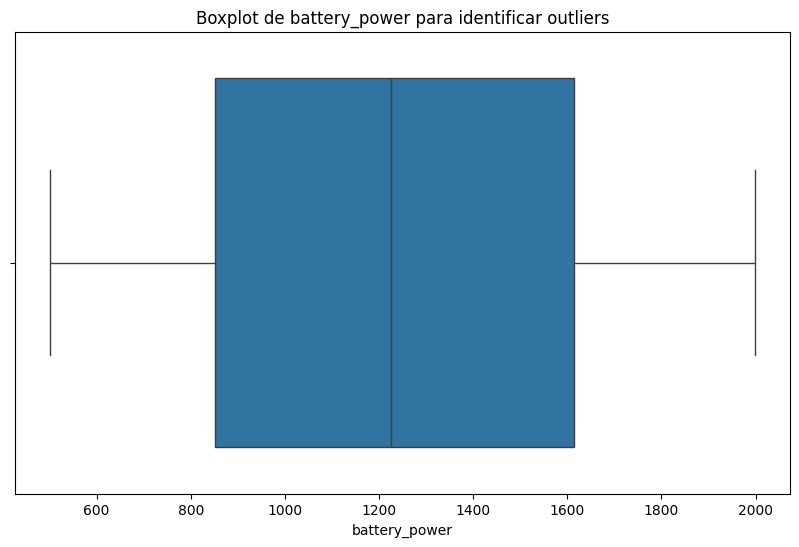

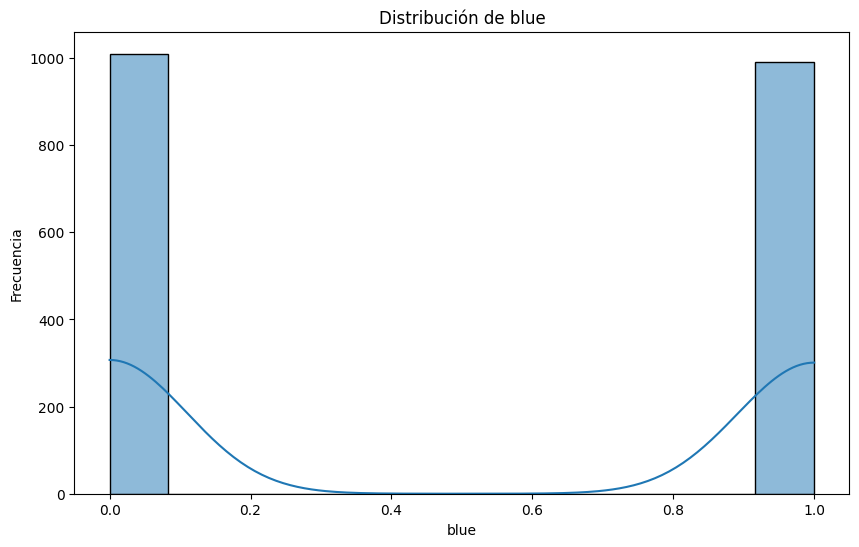

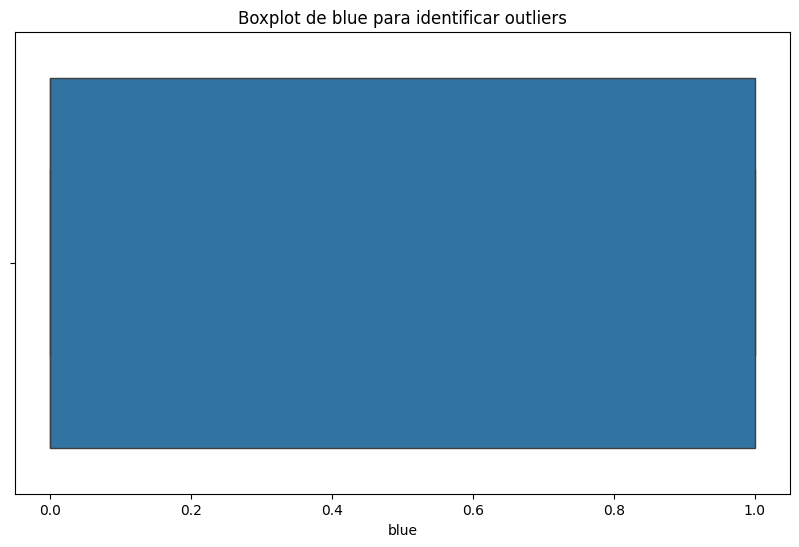

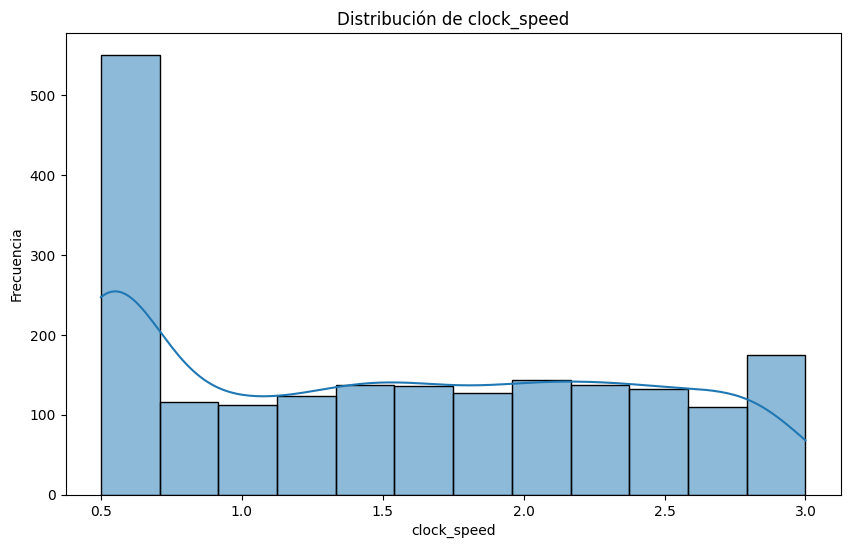

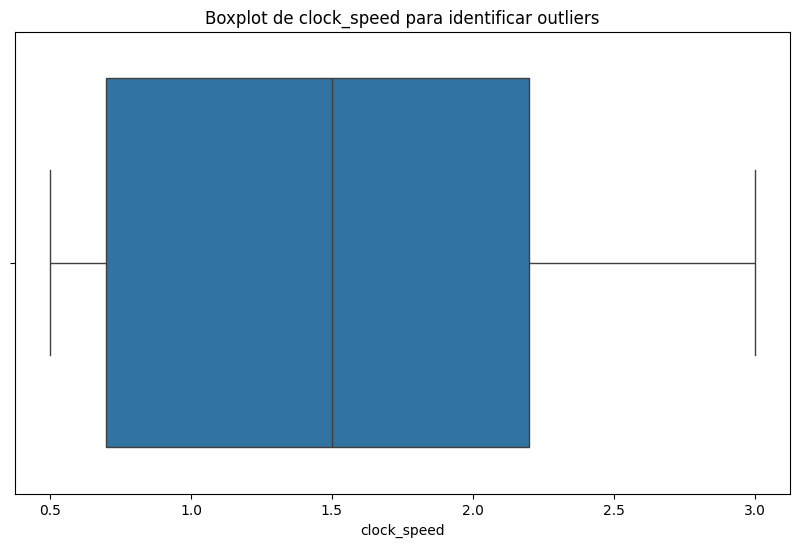

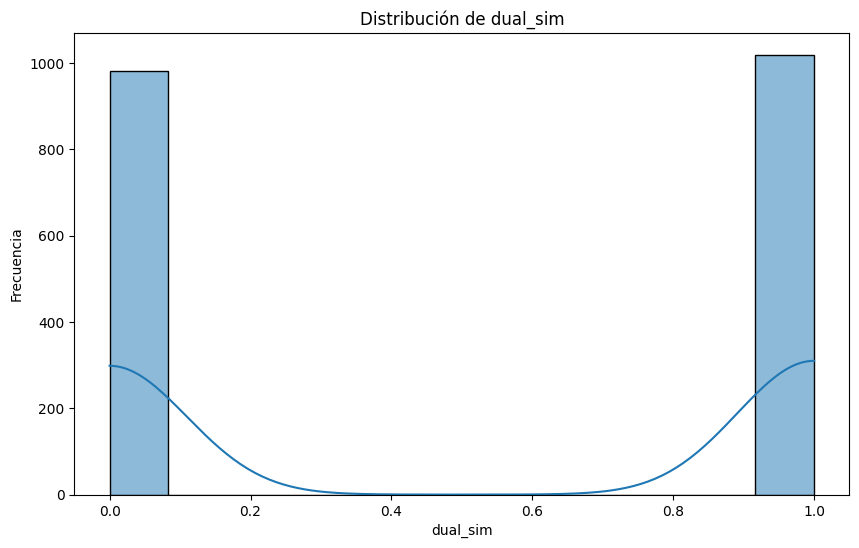

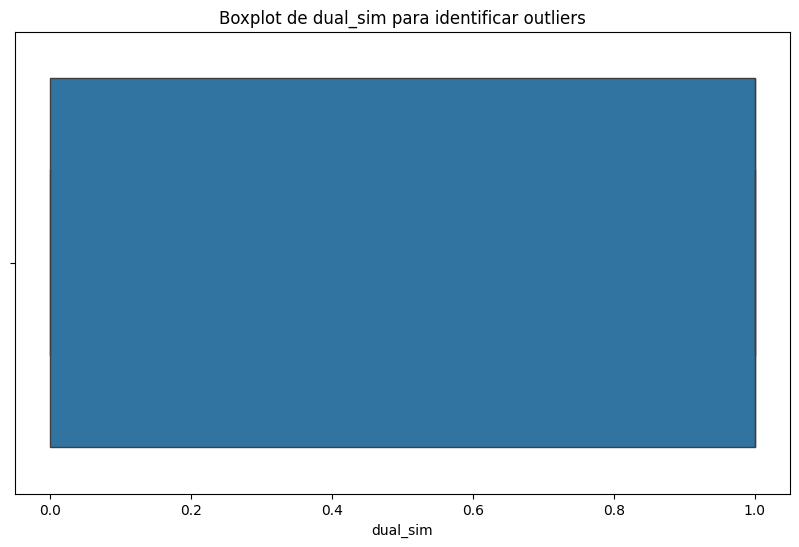

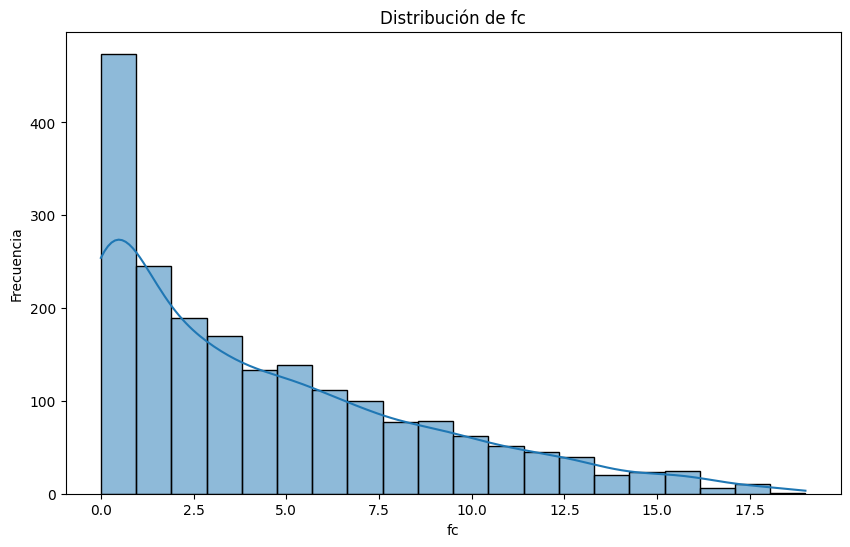

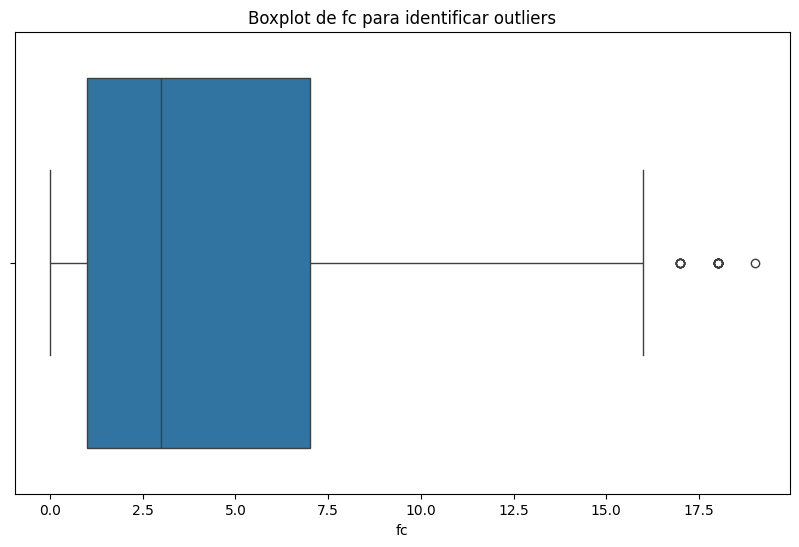

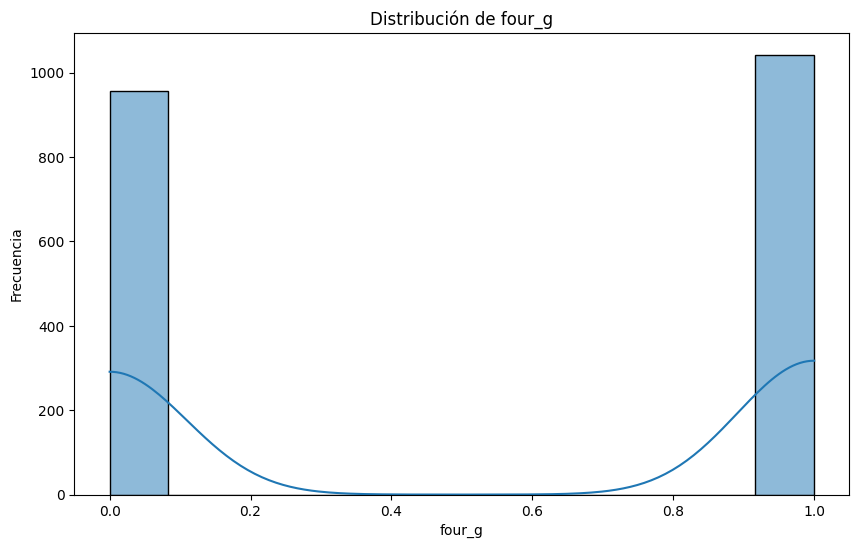

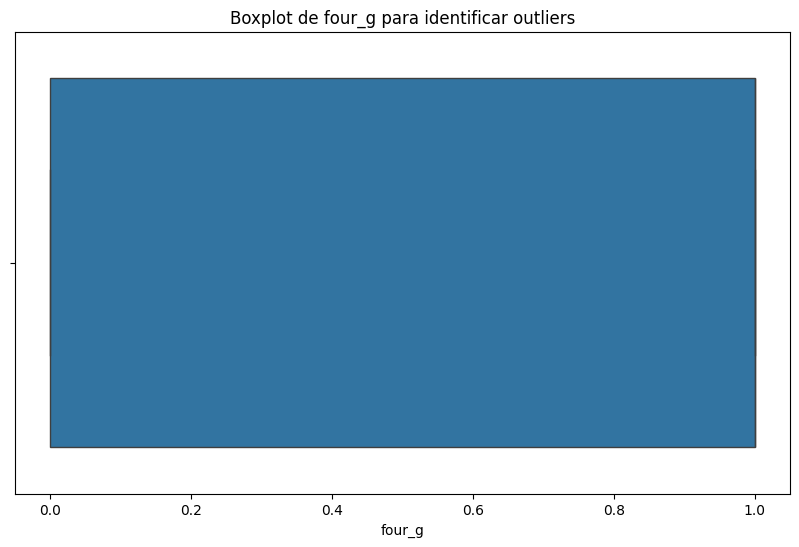

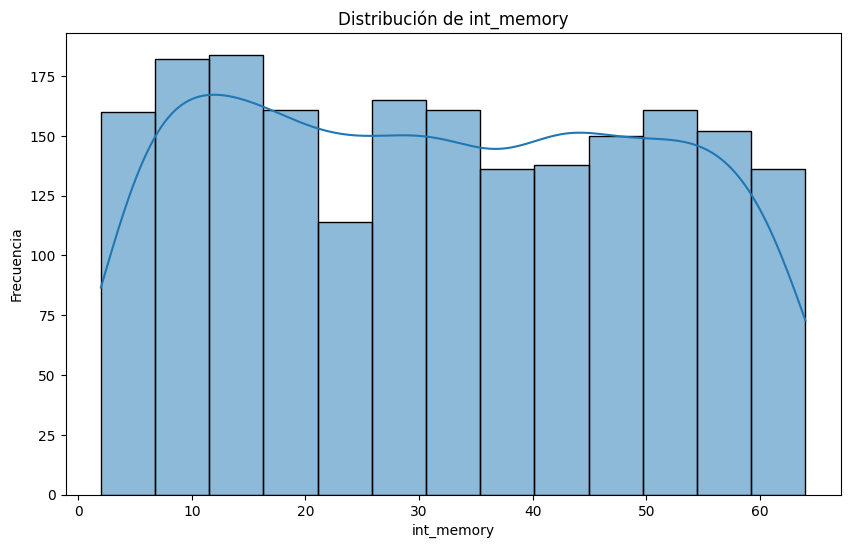

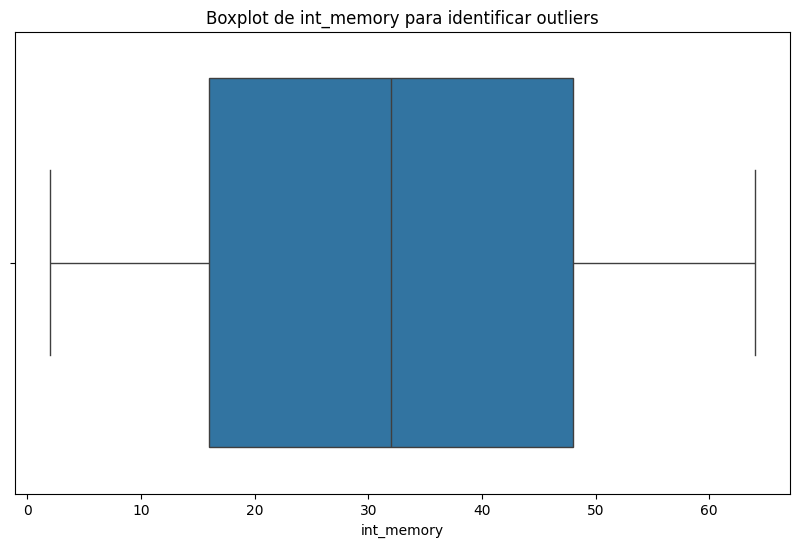

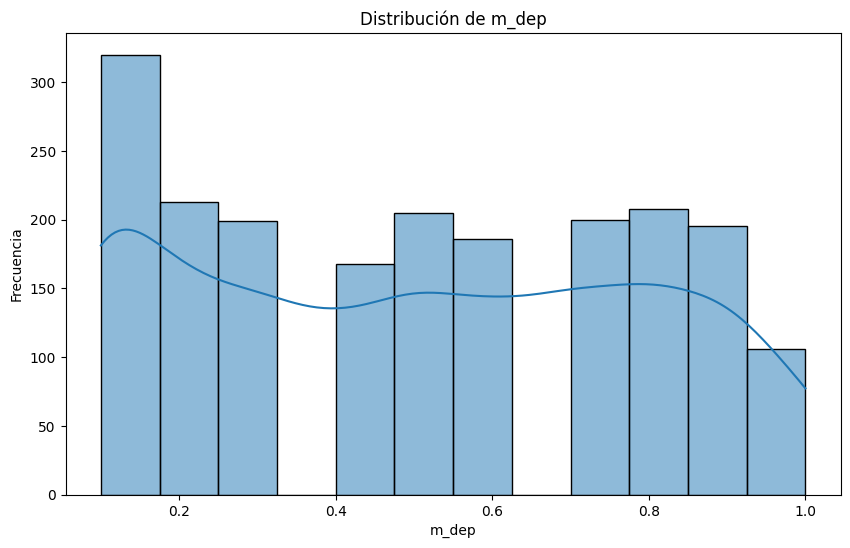

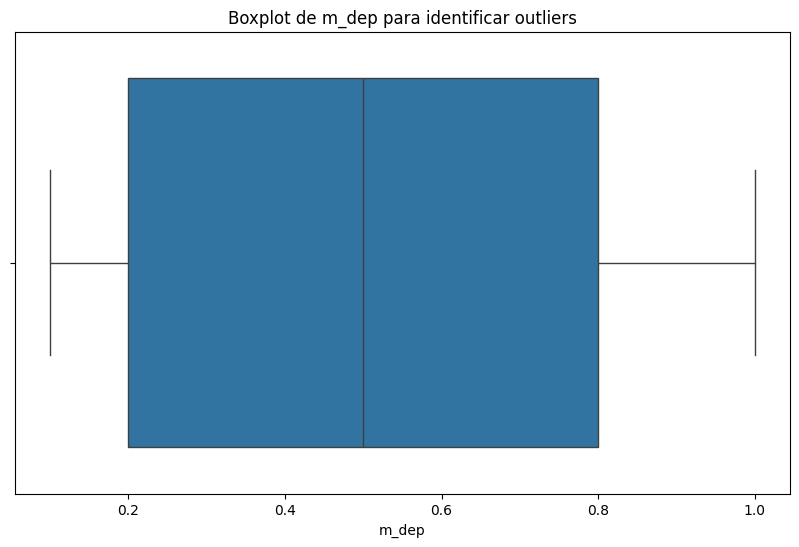

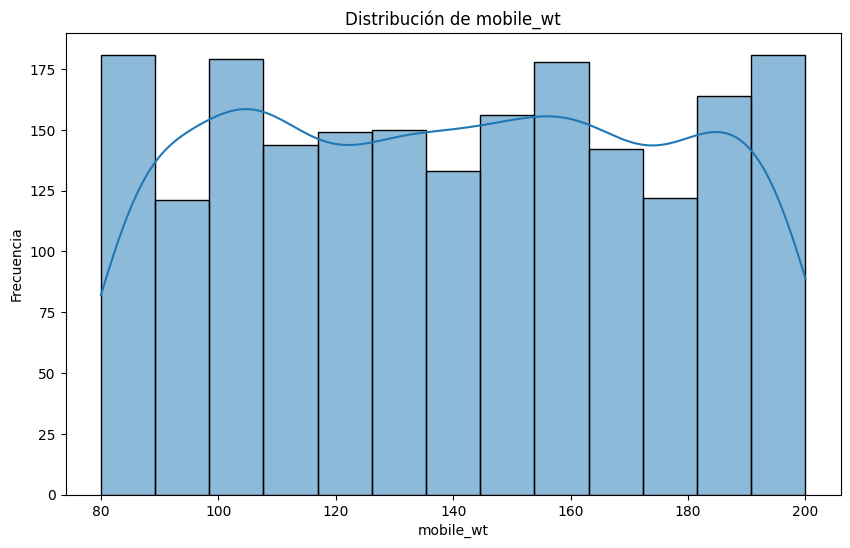

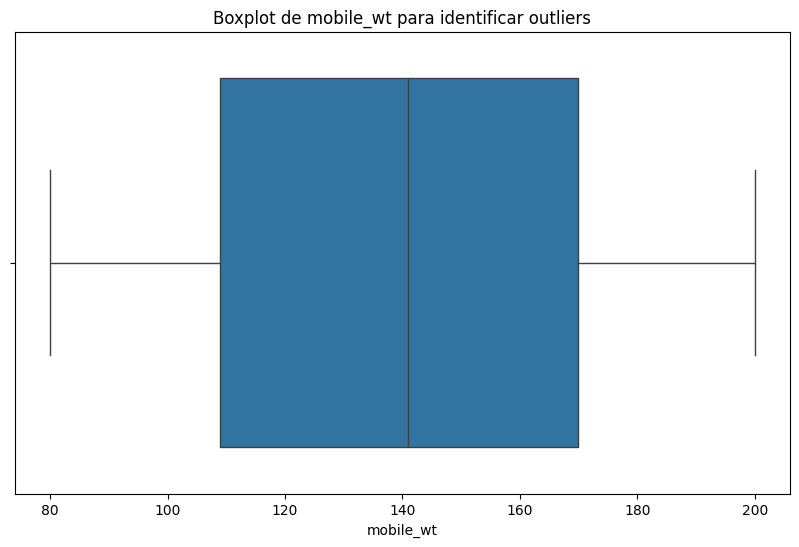

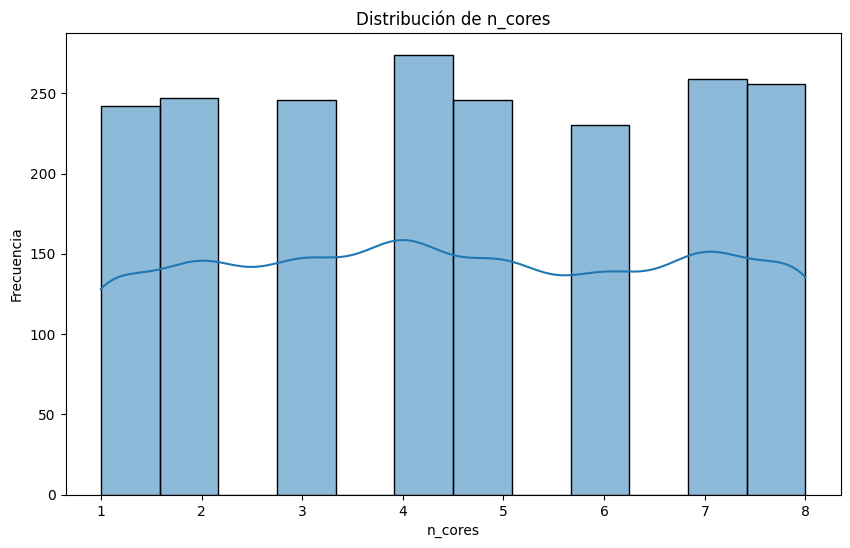

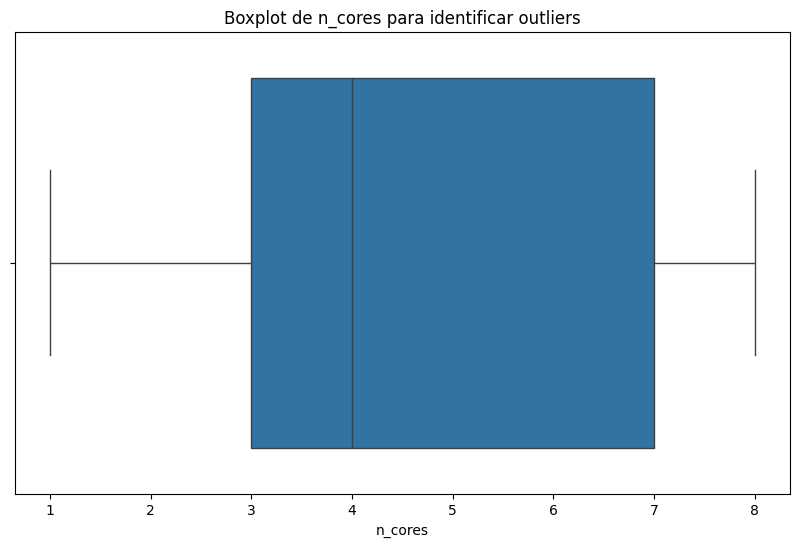

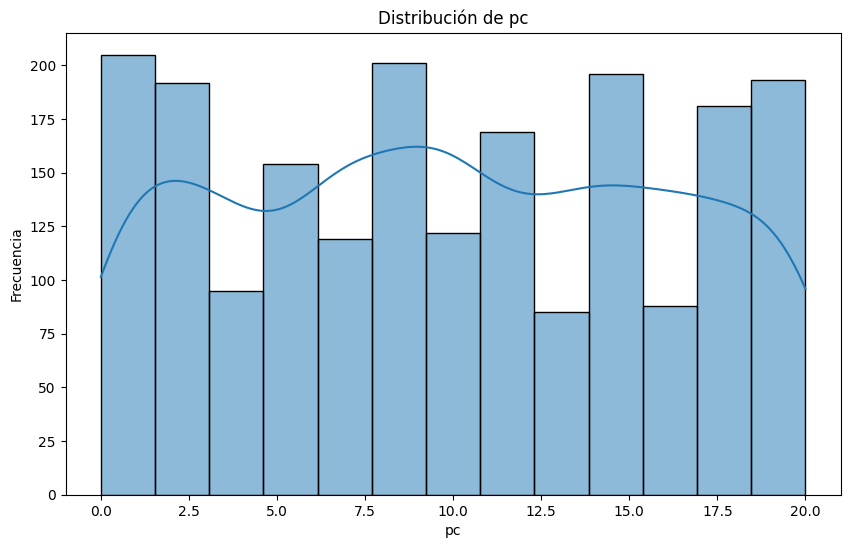

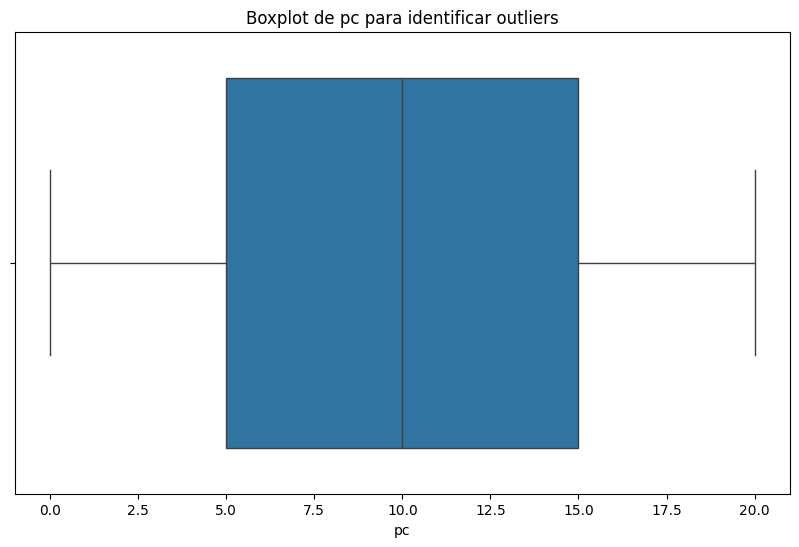

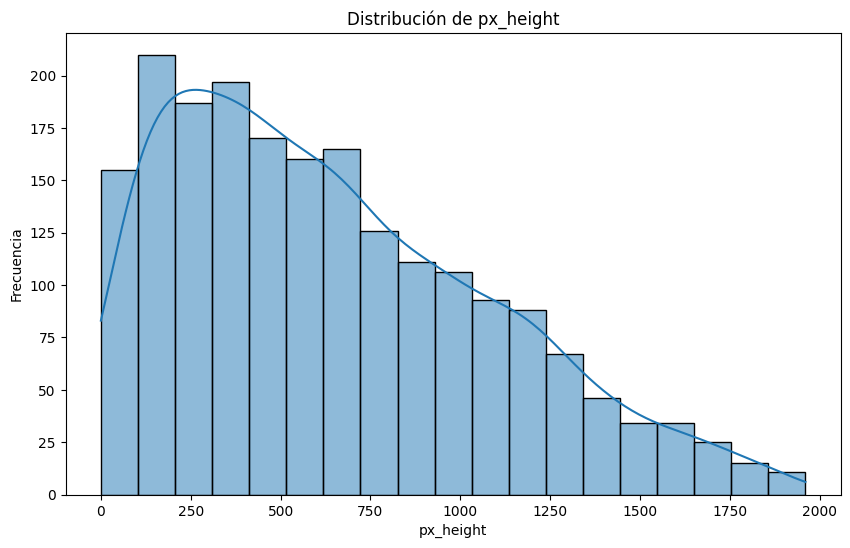

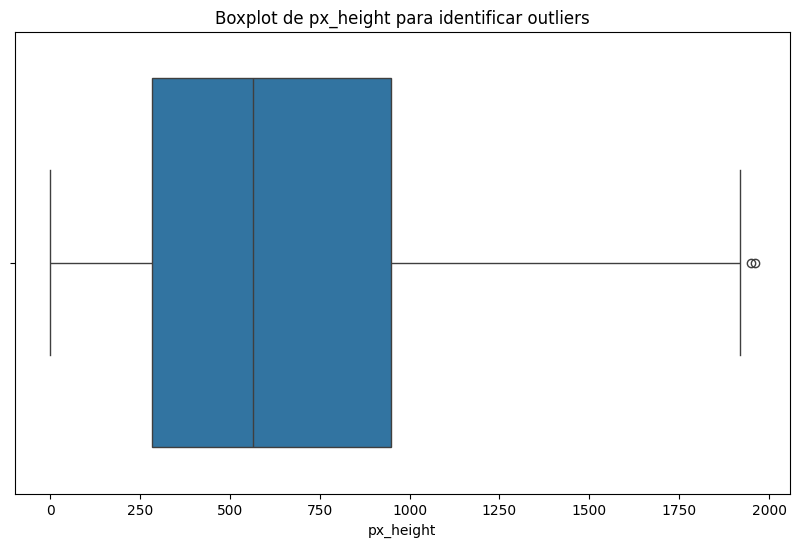

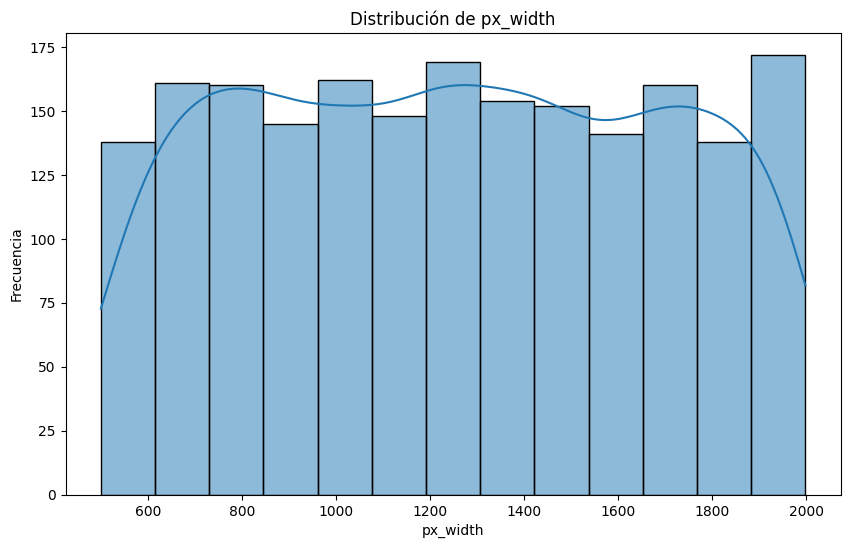

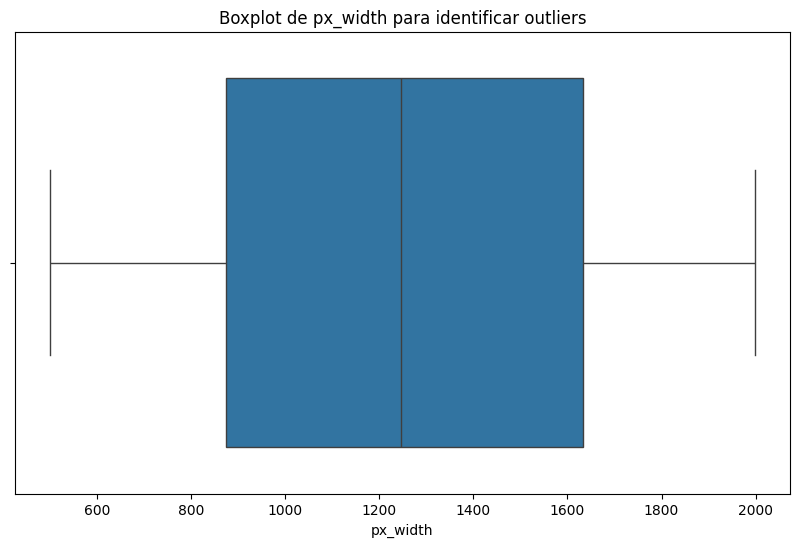

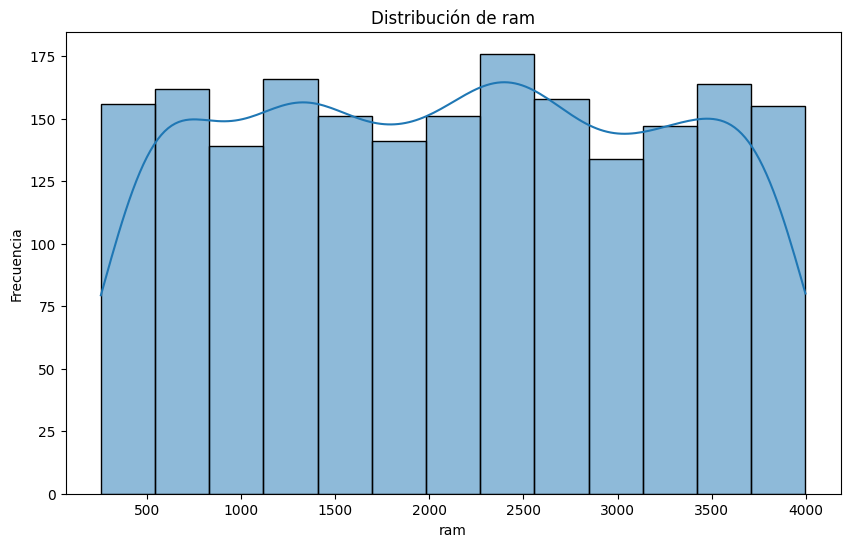

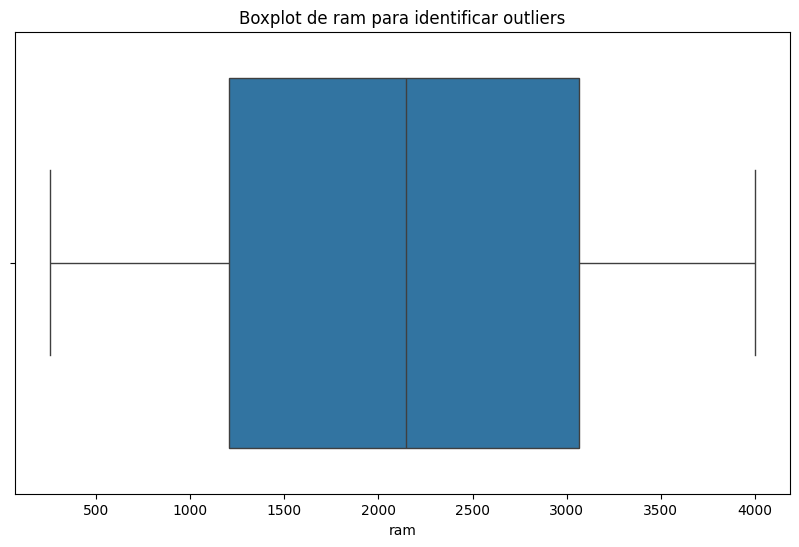

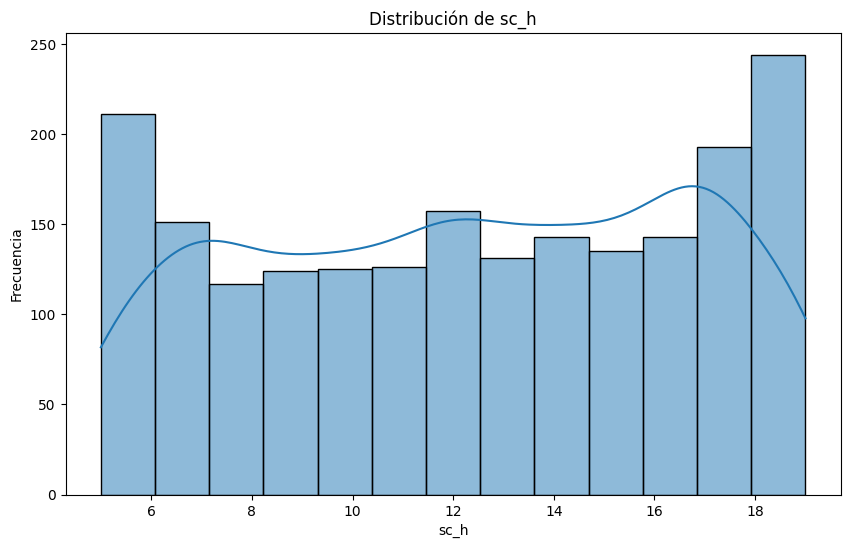

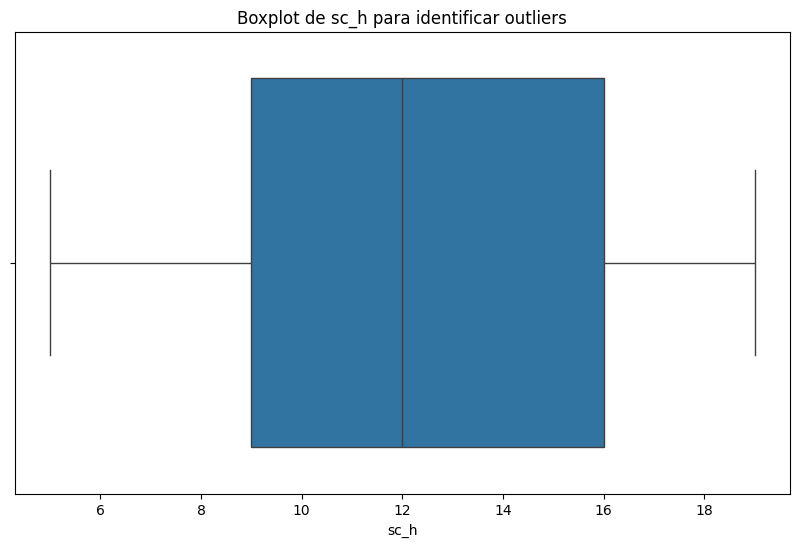

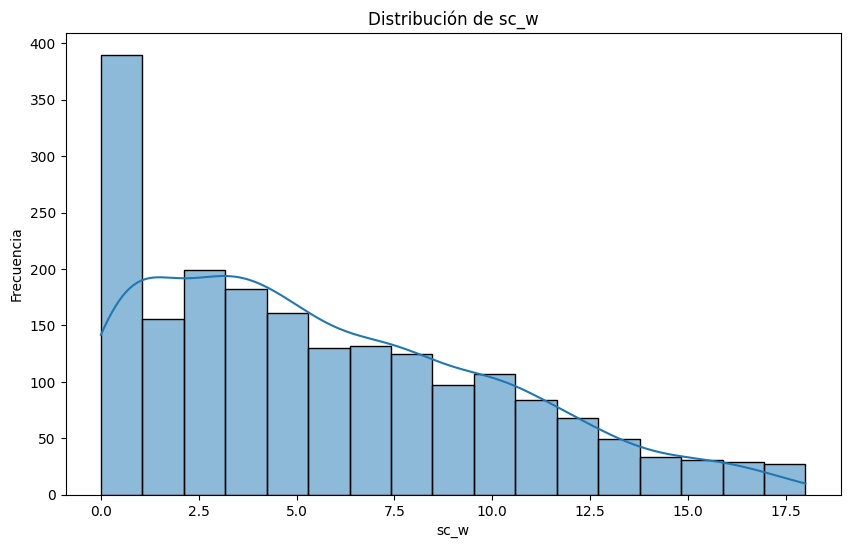

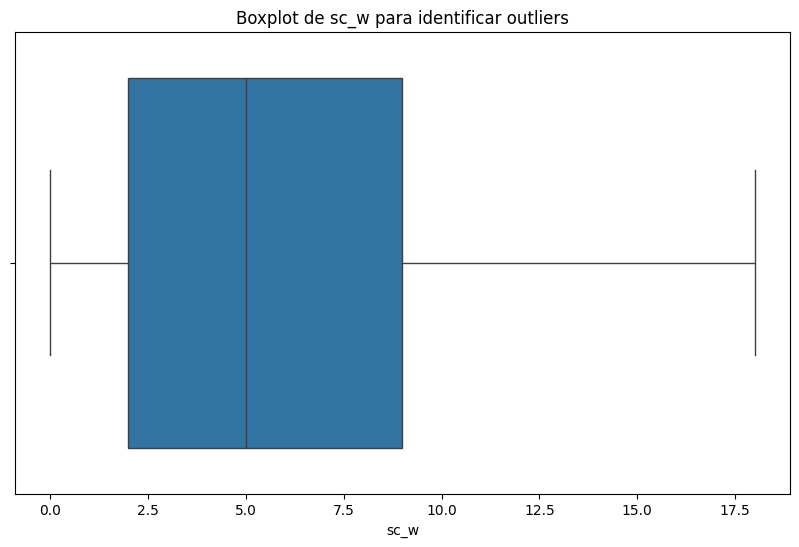

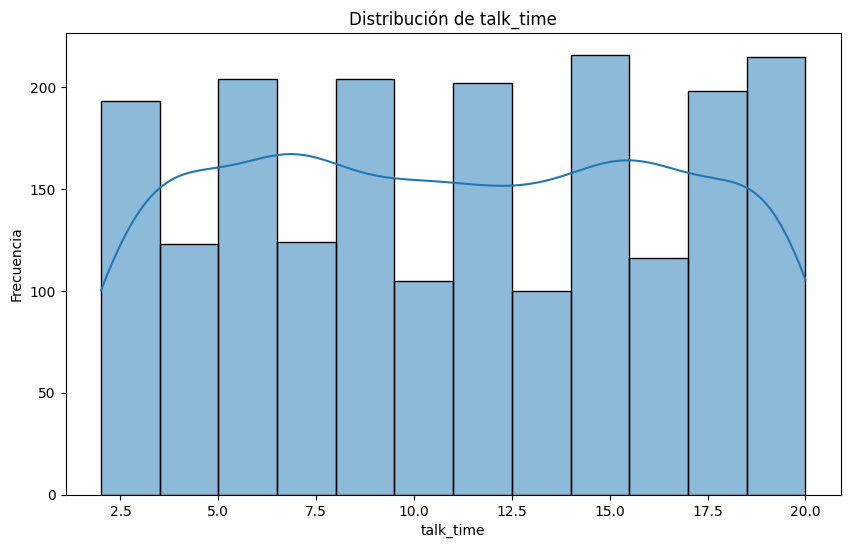

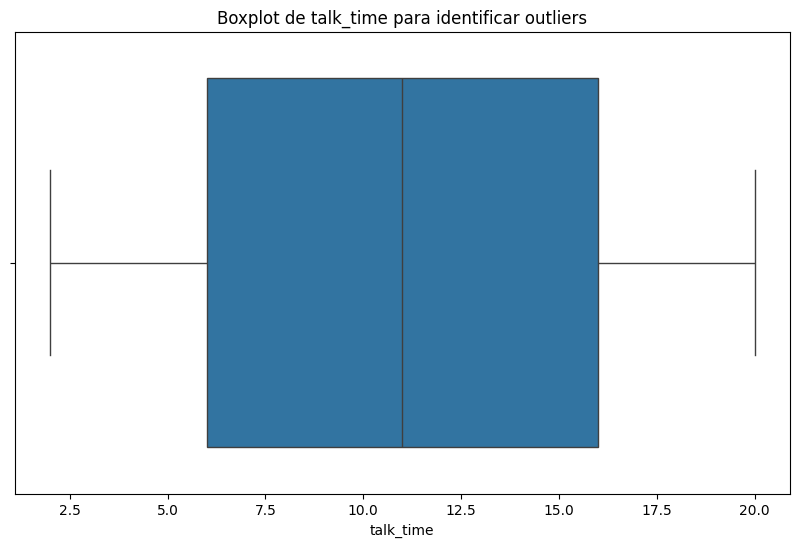

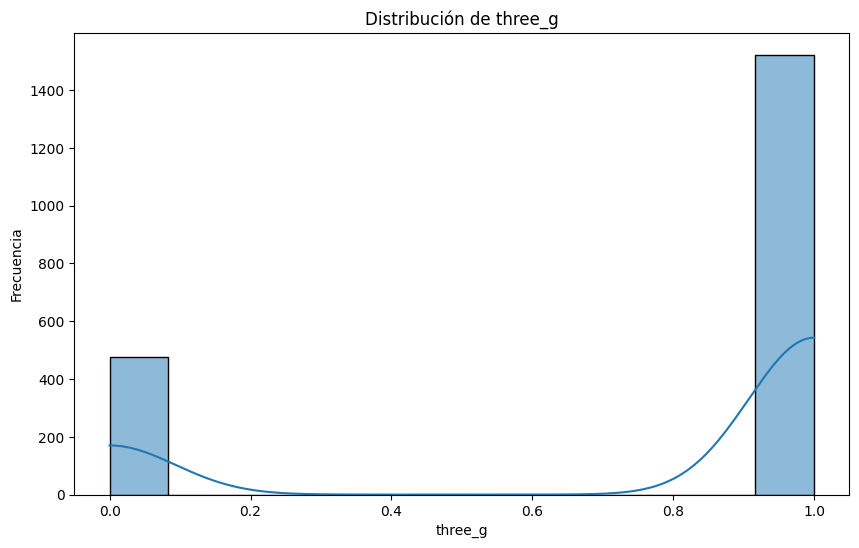

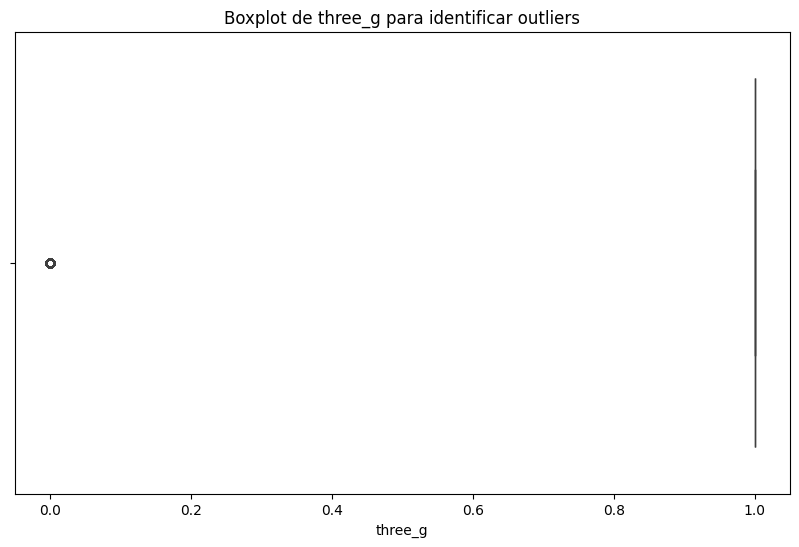

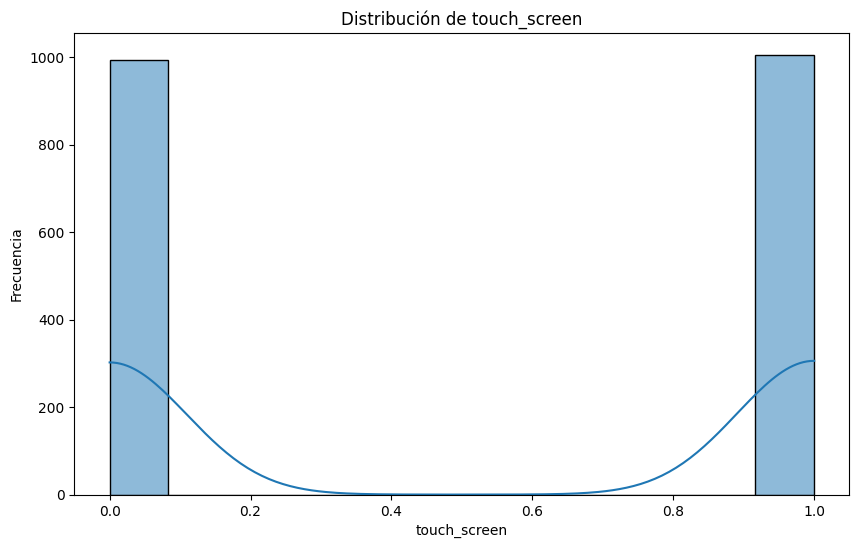

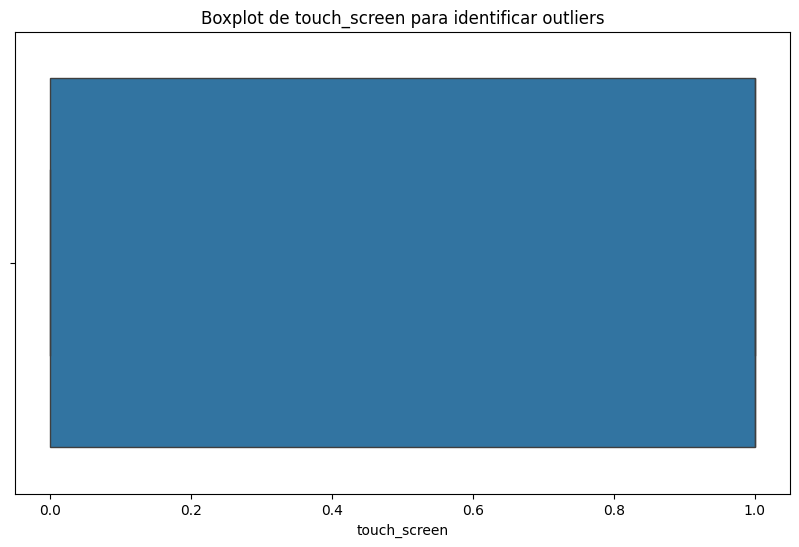

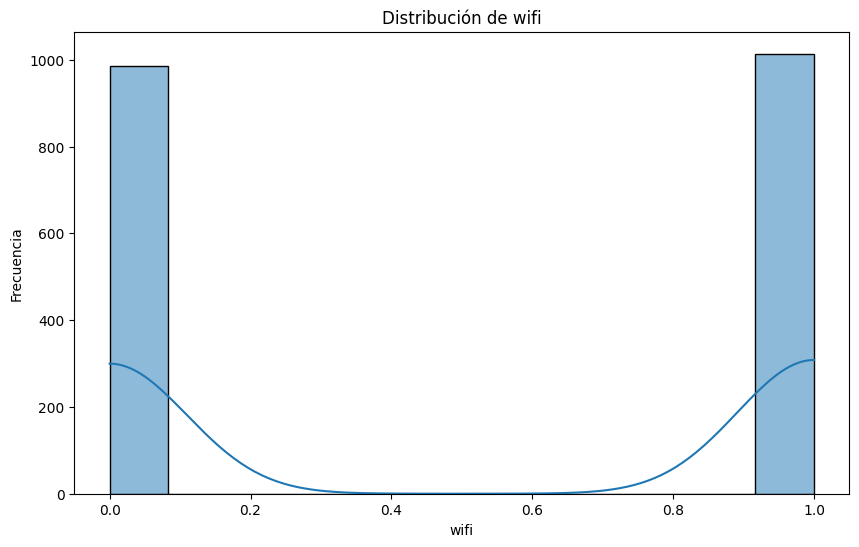

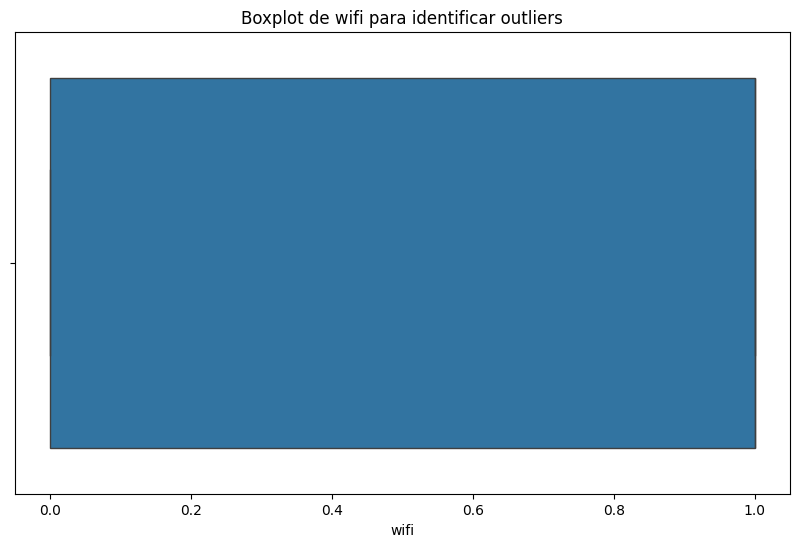

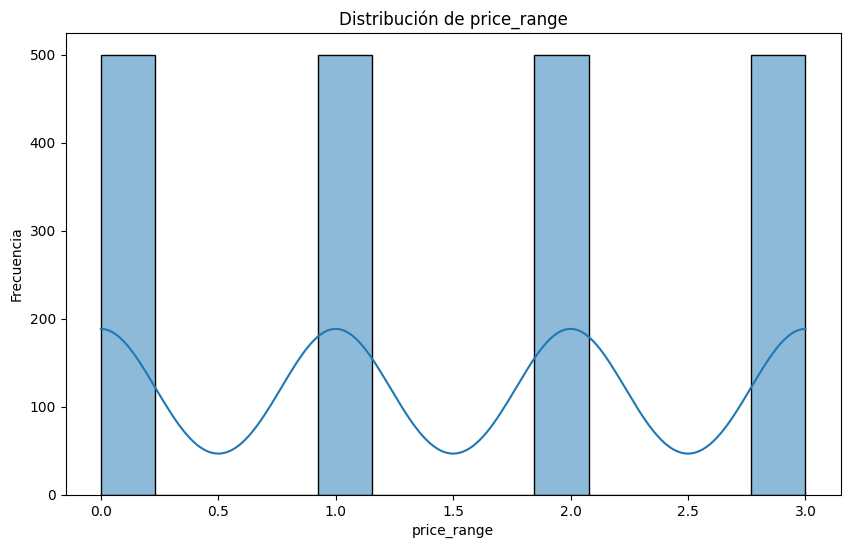

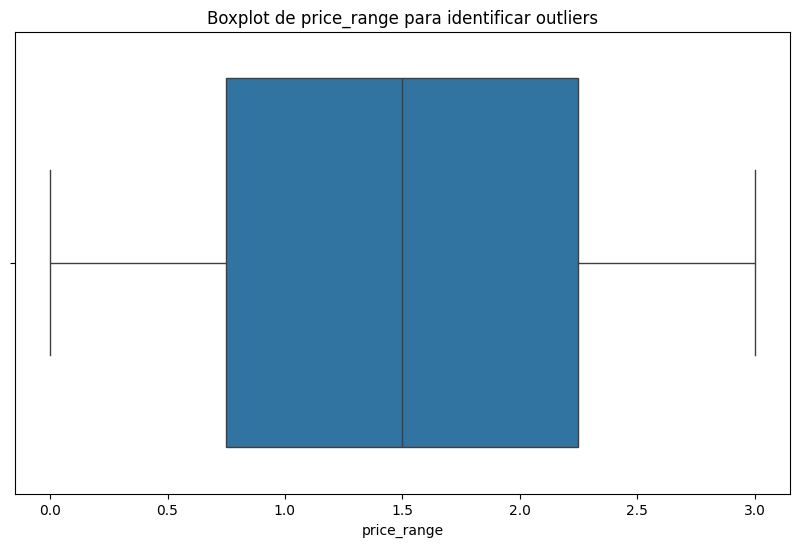

In [20]:
# Visualización de la distribución y outliers
num_cols = df_train.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot de {col} para identificar outliers')
    plt.xlabel(col)
    plt.show()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,846,1144,593,9,4,18,1,1,1,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,...,1194,1727,1115,16,2,18,1,0,1,1
1693,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,2
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,...,334,896,2522,10,5,2,1,0,1,2


In [25]:
df_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


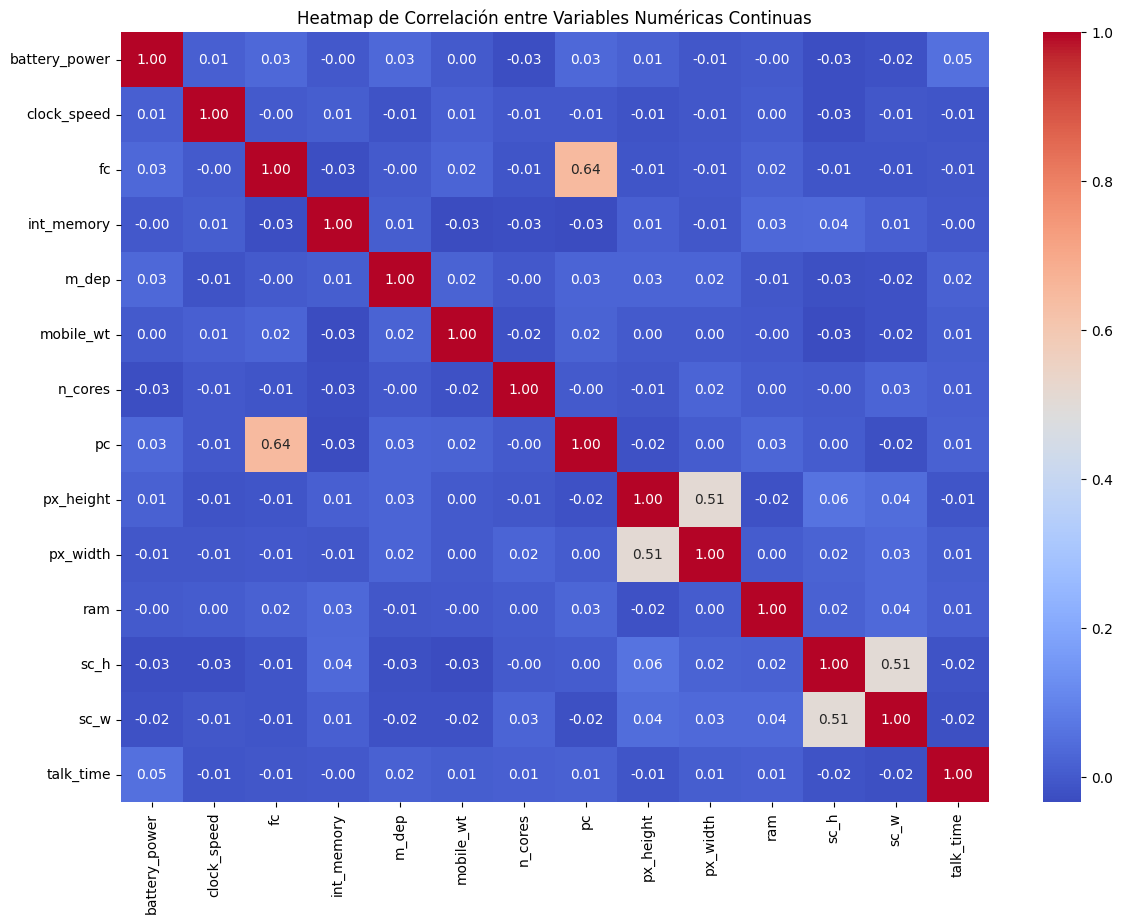

In [26]:
# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar el heatmap con los valores de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación entre Variables Numéricas Continuas')
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Aplicar MinMaxScaler a las columnas numéricas continuas
scaler = MinMaxScaler()
df_train_scaled = df_train.copy()
df_train_scaled[numeric_cols] = scaler.fit_transform(df_numeric)

# Mostrar las primeras filas del DataFrame escalado para verificar
display(df_train_scaled.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


In [28]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [36]:
df_train_scaled['price_binary'] = df_train_scaled['price_range'].apply(lambda x: 0 if x <= 1 else 1)
display(df_train_scaled[['price_range', 'price_binary']].head())

,price_range,price_binary
0,1,0
1,2,1
2,2,1
3,2,1
4,1,0


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:
print("Frecuencia de valores únicos en 'price_range':")
display(df_train['price_range'].value_counts())

print("\nFrecuencia de valores únicos en 'price_binary':")
display(df_train['price_binary'].value_counts())

Frecuencia de valores únicos en 'price_range':


,count
price_range,
1,500
2,500
3,500
0,500



Frecuencia de valores únicos en 'price_binary':


,count
price_binary,
0,1000
1,1000


In [37]:
from sklearn.model_selection import train_test_split

X = df_train_scaled.drop(['price_range', 'price_binary'], axis=1)
y = df_train_scaled['price_binary']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       196
           1       0.94      0.93      0.94       204

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



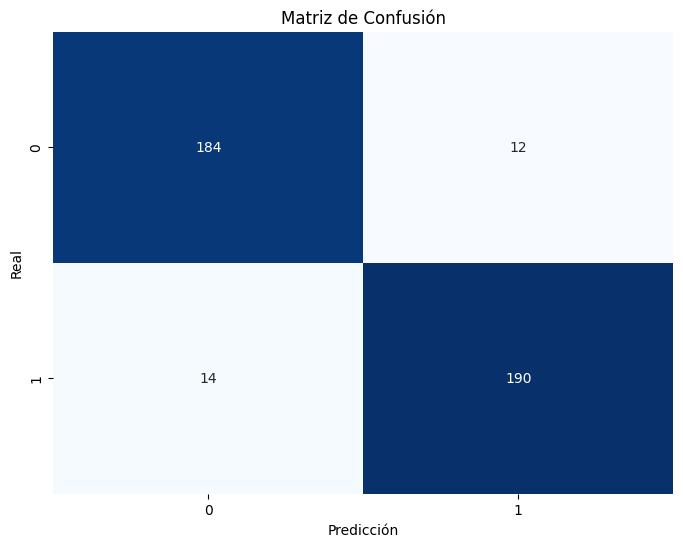

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [43]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.935


In [44]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Balanced Accuracy: 0.9350740296118447


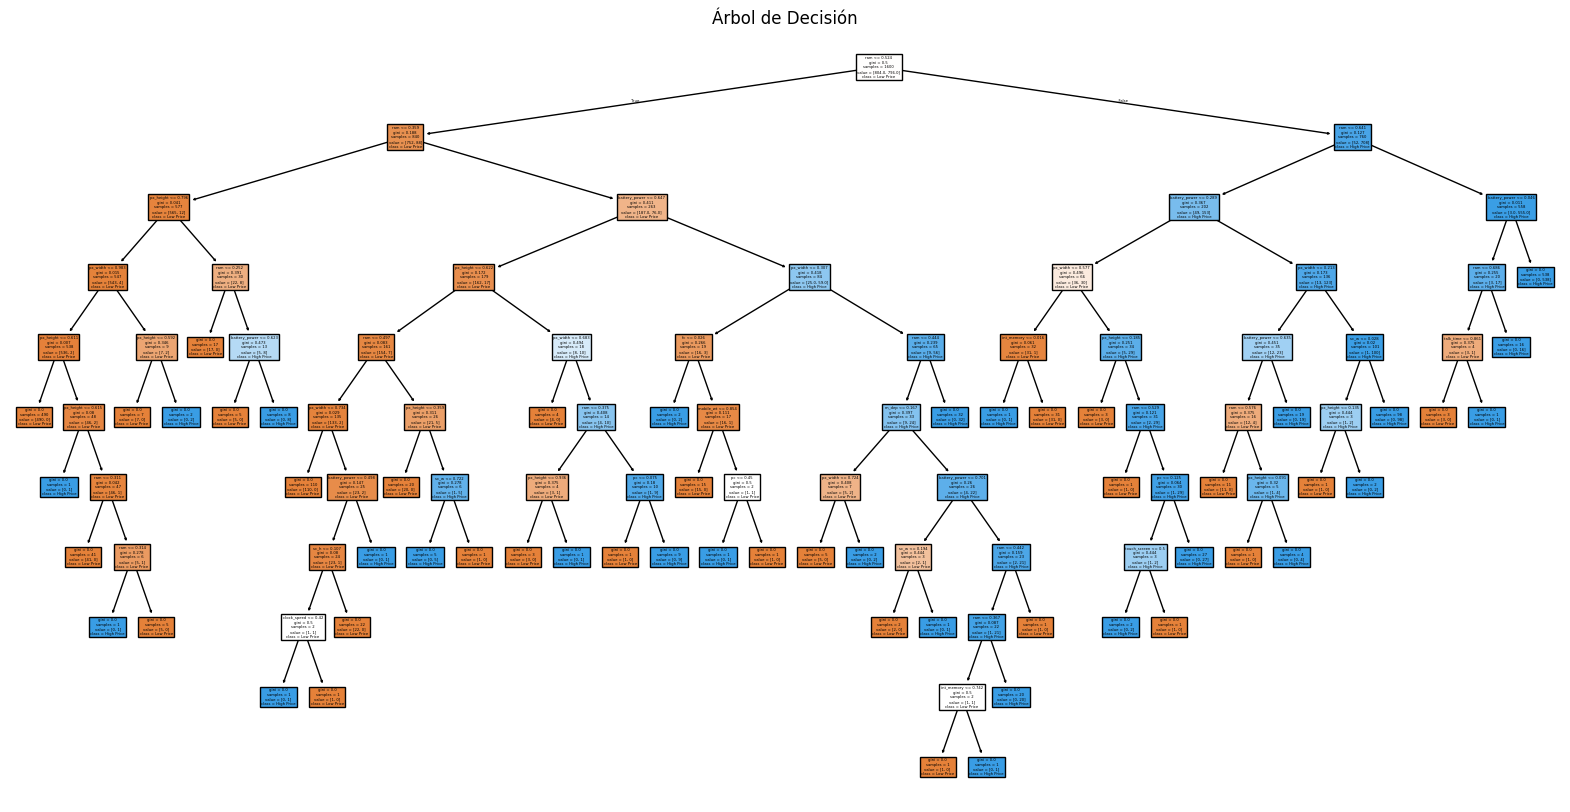

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

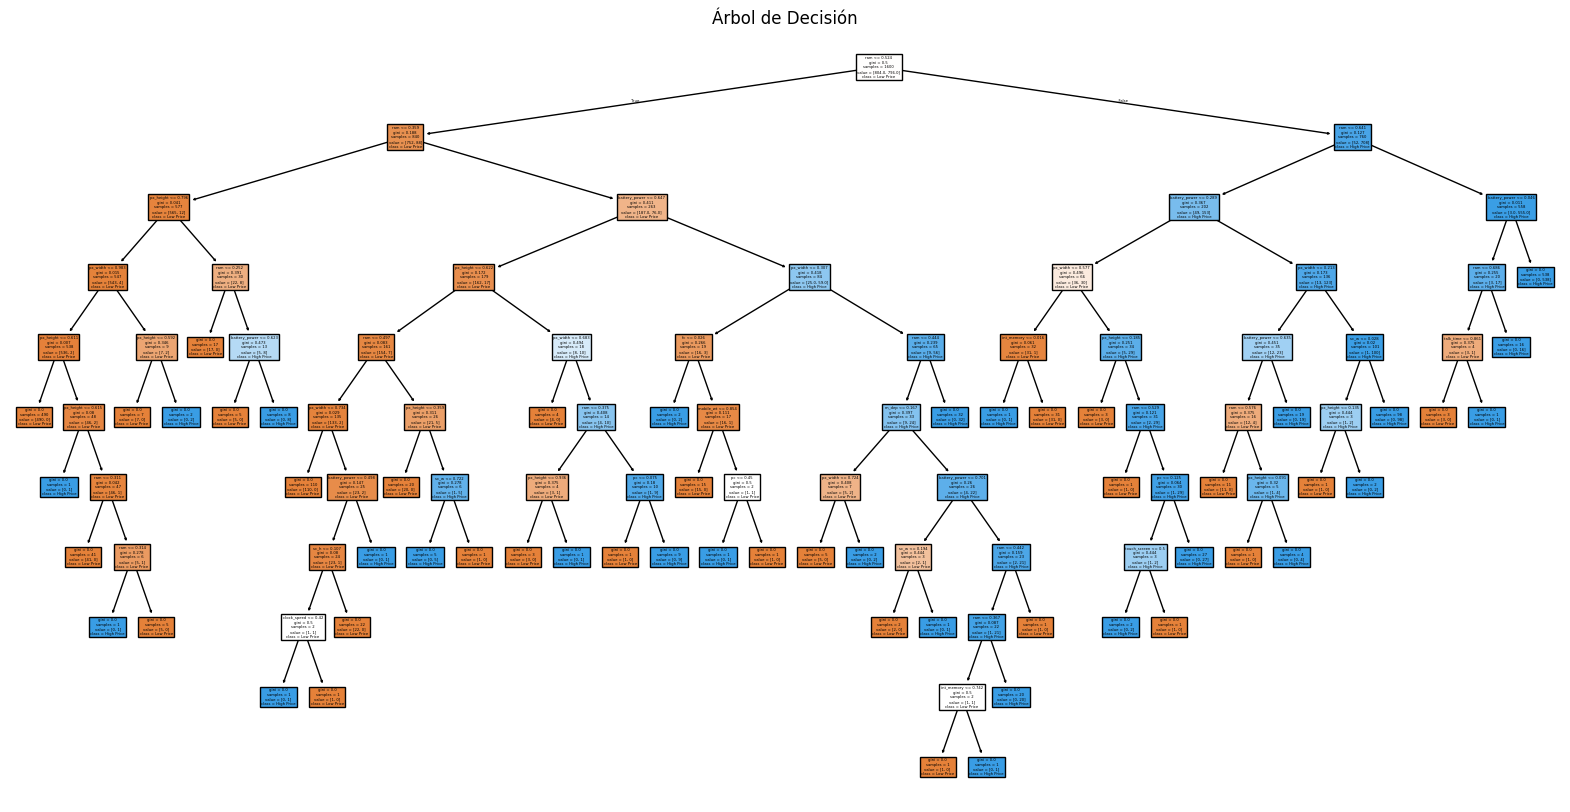

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

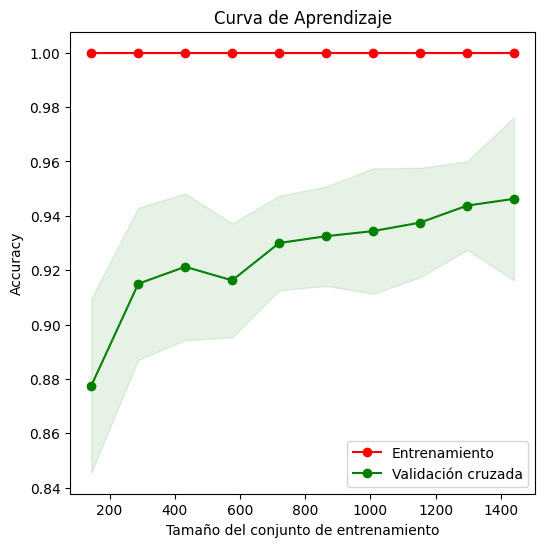

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# ⚡ Generar curvas de aprendizaje directamente con scikit-learn
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=10,               # validación cruzada (puedes cambiar a 3 o 10)
    n_jobs=-1,          # usar todos los núcleos
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"  # métrica, cámbiala si quieres
)

# Promedios y desviaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Graficar
plt.figure(figsize=(6,6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")

# Área sombreada (desviación estándar)
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")

# Líneas promedio
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")

plt.legend(loc="best")
plt.show()

# Explicación Detallada de los Hiperparámetros de sklearn.tree.DecisionTreeClassifier

A continuación, se detalla cada hiperparámetro de la clase `DecisionTreeClassifier` de scikit-learn, explicando qué hace, su valor por defecto, los valores posibles y cuándo modificarlo o elegir un valor específico. Estos hiperparámetros controlan cómo se construye el árbol de decisión, incluyendo la división de nodos, el tamaño del árbol y la prevención del sobreajuste. Modificarlos es clave para adaptar el modelo a tu dataset, especialmente en datasets grandes o ruidosos, donde la regularización es crucial.

## 1. criterion
- **Descripción**: Función que mide la calidad de una división. "gini" usa la impureza de Gini, mientras que "log_loss" y "entropy" usan la ganancia de información de Shannon.
- **Valor por defecto**: 'gini'
- **Valores posibles**: {'gini', 'entropy', 'log_loss'}
- **Cuándo modificarlo**: Usa 'gini' por ser más rápido y adecuado para la mayoría de los casos. Cambia a 'entropy' o 'log_loss' en clases desbalanceadas o para mejorar la interpretabilidad en datasets con alta entropía. Ajusta según resultados de validación cruzada.

## 2. splitter
- **Descripción**: Estrategia para elegir la división en cada nodo. "best" selecciona la mejor división, "random" elige la mejor división aleatoria.
- **Valor por defecto**: 'best'
- **Valores posibles**: {'best', 'random'}
- **Cuándo modificarlo**: Mantén 'best' para datasets pequeños y splits óptimos. Usa 'random' en datasets grandes para reducir overfitting y acelerar el entrenamiento, especialmente en ensembles como Random Forests.

## 3. max_depth
- **Descripción**: Profundidad máxima del árbol. Si es None, crece hasta que las hojas sean puras o tengan menos muestras que min_samples_split.
- **Valor por defecto**: None
- **Valores posibles**: Entero positivo o None
- **Cuándo modificarlo**: Usa None en datasets pequeños. Establece un valor (ej. 3-10) en datasets ruidosos para limitar la profundidad y evitar overfitting. Ajusta con validación cruzada: valores bajos para modelos simples, altos para capturar interacciones complejas.

## 4. min_samples_split
- **Descripción**: Número mínimo de muestras para dividir un nodo interno. Entero: número absoluto; float: fracción del total (ceil(min_samples_split * n_samples)).
- **Valor por defecto**: 2
- **Valores posibles**: Entero (>=2) o float (0.0-1.0)
- **Cuándo modificarlo**: Auméntalo (ej. 10-20) en datasets grandes para evitar splits en nodos con pocas muestras, reduciendo overfitting. Usa float para escalar con el tamaño del dataset. Ajusta si el árbol es demasiado profundo.

## 5. min_samples_leaf
- **Descripción**: Número mínimo de muestras en una hoja. Una división debe dejar al menos este número en cada rama.
- **Valor por defecto**: 1
- **Valores posibles**: Entero (>=1) o float (0.0-0.5)
- **Cuándo modificarlo**: Auméntalo (ej. 5-10) en datasets ruidosos para suavizar el modelo y reducir overfitting. Usa float para datasets variables. Útil en clases desbalanceadas para evitar hojas con pocas muestras.

## 6. min_weight_fraction_leaf
- **Descripción**: Fracción mínima ponderada del total de pesos de muestras en una hoja. Sin pesos, todas las muestras tienen peso igual.
- **Valor por defecto**: 0.0
- **Valores posibles**: Float (>=0.0)
- **Cuándo modificarlo**: Usa un valor positivo (ej. 0.01) con pesos (sample_weight) para asegurar hojas significativas en datasets desbalanceados. Ignóralo si no usas pesos.

## 7. max_features
- **Descripción**: Número de características a considerar para la mejor división. Int: número fijo; float: fracción; "sqrt": sqrt(n_features); "log2": log2(n_features); None: todas.
- **Valor por defecto**: None
- **Valores posibles**: Entero, float, {'sqrt', 'log2'} o None
- **Cuándo modificarlo**: Reduce de None a 'sqrt' o 'log2' en datos de alta dimensionalidad para introducir aleatoriedad y evitar overfitting. Usa int/float para control personalizado. Ajusta en ensembles para diversidad.

## 8. random_state
- **Descripción**: Controla la aleatoriedad. Las características se permutan aleatoriamente si max_features < n_features. Un entero asegura reproducibilidad.
- **Valor por defecto**: None
- **Valores posibles**: Entero, instancia de RandomState o None
- **Cuándo modificarlo**: Usa un entero (ej. 42) para reproducibilidad en experimentos. Usa None para aleatoriedad por defecto. Fija en producción para consistencia.

## 9. max_leaf_nodes
- **Descripción**: Máximo de hojas en modo "best-first" basado en reducción de impureza. Si None, sin límite.
- **Valor por defecto**: None
- **Valores posibles**: Entero positivo o None
- **Cuándo modificarlo**: Establece un valor (ej. 10-50) para limitar el tamaño del árbol en datasets pequeños y evitar overfitting. Usa None en datasets grandes. Alternativa a max_depth.

## 10. min_impurity_decrease
- **Descripción**: Un nodo se divide si la disminución de impureza es mayor o igual a este valor, ponderado por el número de muestras.
- **Valor por defecto**: 0.0
- **Valores posibles**: Float (>=0.0)
- **Cuándo modificarlo**: Auméntalo (ej. 0.01) en datasets ruidosos para requerir splits significativos, reduciendo overfitting. Útil como regularización adicional.

## 11. class_weight
- **Descripción**: Pesos para clases en formato {clase: peso}. "balanced" ajusta inversamente a la frecuencia. Para multi-output, lista de dicts.
- **Valor por defecto**: None (todos peso 1)
- **Valores posibles**: Dict, lista de dicts, 'balanced' o None
- **Cuándo modificarlo**: Usa 'balanced' o pesos personalizados en datasets desbalanceados para priorizar clases minoritarias. Ignóralo si las clases son balanceadas.

## 12. ccp_alpha
- **Descripción**: Parámetro de complejidad para poda de costo-complejidad mínima. Subárboles con complejidad menor se podan.
- **Valor por defecto**: 0.0 (sin poda)
- **Valores posibles**: Float (>=0.0)
- **Cuándo modificarlo**: Auméntalo (ej. 0.01) para podar el árbol y reducir overfitting en datos ruidosos. Ajusta con validación cruzada para balancear complejidad y precisión.

## 13. monotonic_cst
- **Descripción**: Constraint de monotonicidad por característica: 1 (aumento monotonic), 0 (sin constraint), -1 (disminución monotonic). Aplica a la probabilidad de la clase positiva. No soporta multiclass, multioutput o valores faltantes.
- **Valor por defecto**: None (sin constraints)
- **Valores posibles**: Array-like de ints (forma (n_features)) con -1, 0, 1, o None
- **Cuándo modificarlo**: Úsalo para forzar relaciones monotónicas (ej. mayor ingreso → mayor probabilidad) en dominios como scoring crediticio. Consulta la guía de usuario para detalles. Agregado en versión 1.4.

**Nota**: Los hiperparámetros como max_depth y min_samples_leaf suelen combinarse para regularización. Usa grid search o random search para optimizarlos según tu dataset.

In [50]:
from sklearn.model_selection import GridSearchCV



# Diccionario de hiperparámetros a probar
# Elegí rangos razonables para tu dataset (2000 muestras, ~20 features).
# Puedes ajustar si quieres más/menos combinaciones (esto genera ~1000 fits con cv=5, toma tiempo pero es manejable).
param_grid = {
    'criterion': ['gini', 'entropy'],  # Métricas de impureza
    'max_depth': [None, 3, 5, 10],  # Profundidad máxima para controlar overfitting
    'min_samples_split': [2, 5, 10],    # Mínimo muestras para split
    'min_samples_leaf': [1, 2, 4],      # Mínimo muestras en hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número de features por split
    'class_weight': [None, 'balanced']  # Para manejar posible desbalance
}

In [51]:
# Configuramos GridSearchCV
# cv=5 para validación cruzada de 5 folds
# scoring='accuracy' (puedes cambiar a 'balanced_accuracy' o 'f1' si prefieres)
# n_jobs=-1 para usar todos los núcleos y acelerar
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)


In [52]:
# Ajustamos el modelo con GridSearchCV (esto puede tomar unos minutos)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [53]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [54]:
# Mejor score en validación cruzada
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

Mejor accuracy en validación cruzada: 0.9519


In [55]:
# Usamos el mejor modelo para predecir en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [56]:
# Evaluamos el mejor modelo
print("\nReporte de clasificación con el mejor modelo:")
print(classification_report(y_test, y_pred))


Reporte de clasificación con el mejor modelo:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       196
           1       0.97      0.94      0.96       204

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



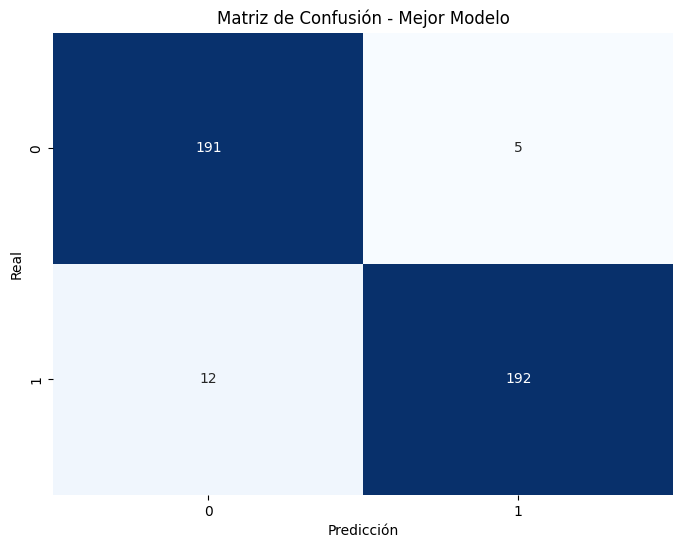

In [57]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Mejor Modelo")
plt.show()

In [58]:
# Accuracy y Balanced Accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {accuracy:.4f}")
print(f"Balanced Accuracy en test: {balanced_accuracy:.4f}")

Accuracy en test: 0.9575
Balanced Accuracy en test: 0.9578


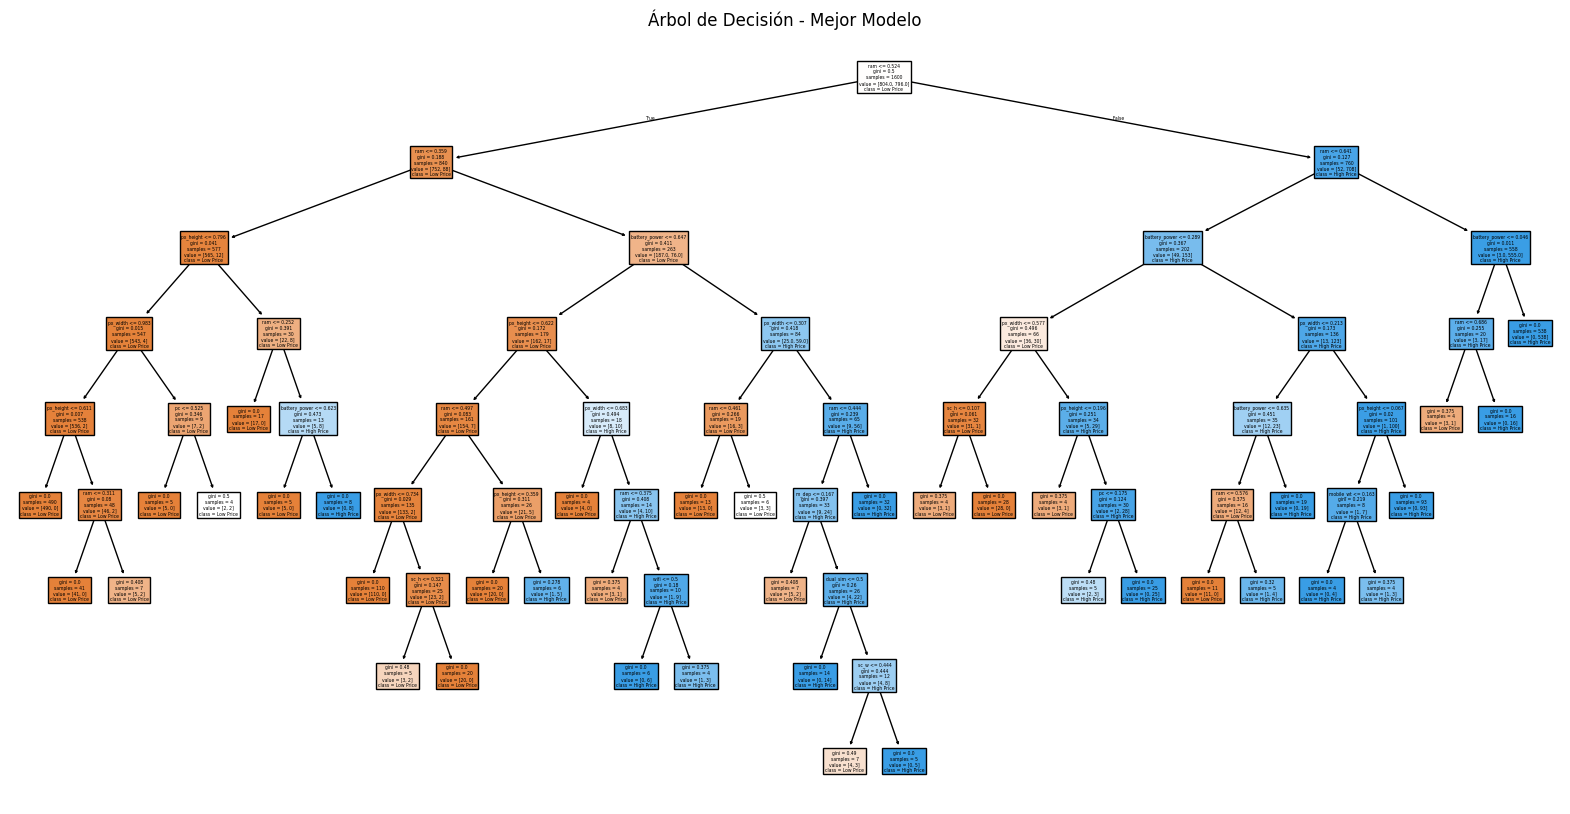

In [59]:
# Visualizamos el árbol del mejor modelo
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión - Mejor Modelo")
plt.show()

In [60]:
import pickle

# Guardar el modelo entrenado
with open("tree_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [62]:
import pickle

# Guardar el modelo entrenado
with open("tree_model_first.pkl", "wb") as f:
    pickle.dump(model, f)

In [63]:
import pandas as pd
import pickle

# Cargar modelo entrenado
with open("tree_model.pkl", "rb") as f:
    model = pickle.load(f)

# Cargar test.csv
test = pd.read_csv("test.csv")

# Crear un diccionario para acceder rápido por id
test_indexed = test.set_index('id')

# Programa interactivo
while True:
    try:
        user_input = input("Ingresa el ID del móvil (o 'salir' para terminar): ")
        if user_input.lower() == 'salir':
            print("Programa terminado.")
            break

        mobile_id = int(user_input)

        if mobile_id not in test_indexed.index:
            print("ID no encontrado. Intenta de nuevo.")
            continue

        # Tomar los datos del móvil y eliminar columnas que no usamos
        X_mobile = test_indexed.loc[[mobile_id]].drop(columns=[])

        # Predecir
        pred = model.predict(X_mobile)[0]

        # Mostrar resultado
        clase = "Barato" if pred == 0 else "Caro"
        print(f"El móvil con ID {mobile_id} se clasifica como: {clase}\n")

    except ValueError:
        print("Entrada no válida. Ingresa un número de ID.")



Ingresa el ID del móvil (o 'salir' para terminar): 95
El móvil con ID 95 se clasifica como: Caro

Ingresa el ID del móvil (o 'salir' para terminar): salir
Programa terminado.


In [64]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Cargar test.csv
test = pd.read_csv("test.csv")

# Crear un diccionario para acceder rápido por id
test_indexed = test.set_index('id')

# Inicializar el escalador (asumimos que los datos numéricos fueron escalados con MinMaxScaler en el entrenamiento)
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]  # Excluir columnas no numéricas o target
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])  # Ajustamos con los datos de test (idealmente usa datos de entrenamiento)

# Programa interactivo
while True:
    # Selección del modelo al inicio o después de salir
    model_choice = input("Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): ")
    if model_choice.lower() == 'salir':
        print("Programa terminado.")
        break

    if model_choice not in ['1', '2']:
        print("Opción no válida. Elige 1, 2 o 'salir'.")
        continue

    # Cargar el modelo seleccionado
    model_file = "tree_model_first.pkl" if model_choice == '1' else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: El archivo {model_file} no se encontró. Verifica los nombres de los archivos.")
        continue
    except Exception as e:
        print(f"Error al cargar el modelo: {e}. Intenta de nuevo.")
        continue

    print(f"Modelo {model_file} cargado exitosamente.\n")

    while True:  # Bucle interno para predicciones con el modelo elegido
        try:
            user_input = input("Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): ")
            if user_input.lower() == 'salir':
                print("Programa terminado.")
                break
            elif user_input.lower() == 'cambiar':
                print("Volviendo al menú de selección de modelo...\n")
                break

            mobile_id = int(user_input)

            if mobile_id not in test_indexed.index:
                print("ID no encontrado. Intenta de nuevo.")
                continue

            # Tomar los datos del móvil
            X_mobile = test_indexed.loc[[mobile_id]].copy()

            # Escalar las columnas numéricas
            X_mobile[numeric_cols] = scaler.transform(X_mobile[numeric_cols])

            # Predecir
            pred = model.predict(X_mobile)[0]
            proba = model.predict_proba(X_mobile)[0]  # Probabilidades de cada clase

            # Calcular nivel de confianza aproximado
            sorted_proba = sorted(proba, reverse=True)
            confidence = (sorted_proba[0] - sorted_proba[1]) * 100  # Convertimos a porcentaje

            # Mostrar resultado
            clase = "Barato" if pred == 0 else "Caro"
            print(f"El móvil con ID {mobile_id} se clasifica como: {clase}")
            print(f"Nivel de confianza aproximado: {confidence:.2f}%")

            # Mostrar características del teléfono
            print("\nCaracterísticas del teléfono:")
            for col in X_mobile.columns:
                if col not in ['id', 'price_range', 'price_binary']:  # Excluir columnas no relevantes
                    value = X_mobile[col].iloc[0]
                    print(f"{col}: {value}")

            print()  # Línea en blanco para separar iteraciones

        except ValueError:
            print("Entrada no válida. Ingresa un número de ID, 'cambiar' o 'salir'.")
        except Exception as e:
            print(f"Ocurrió un error: {e}. Intenta de nuevo.")

    if user_input.lower() == 'salir':
        break

Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): 2
Modelo tree_model.pkl cargado exitosamente.

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 95
El móvil con ID 95 se clasifica como: Caro
Nivel de confianza aproximado: 100.00%

Características del teléfono:
battery_power: 0.11941294196130753
blue: 0.0
clock_speed: 0.16000000000000003
dual_sim: 1.0
fc: 0.0
four_g: 0.0
int_memory: 0.6290322580645161
m_dep: 0.2222222222222222
mobile_wt: 0.6166666666666666
n_cores: 0.42857142857142855
pc: 0.05
px_height: 0.40534871525957
px_width: 0.2798931195724783
ram: 0.6910896403650028
sc_h: 0.9999999999999999
sc_w: 0.38888888888888884
talk_time: 0.2222222222222222
three_g: 0.0
touch_screen: 0.0
wifi: 1.0

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 5
El móvil con ID 5 se clasifica como: Barato
Nivel de confianza aproximado: 100.00%

Características del teléfono:
battery_pow

In [65]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Cargar test.csv
test = pd.read_csv("test.csv")

# Crear un diccionario para acceder rápido por id
test_indexed = test.set_index('id')

# Inicializar el escalador (asumimos que los datos numéricos fueron escalados con MinMaxScaler en el entrenamiento)
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]  # Excluir columnas no numéricas o target
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])  # Ajustamos con los datos de test (idealmente usa datos de entrenamiento)

# Programa interactivo
while True:
    # Selección del modelo al inicio o después de salir
    model_choice = input("Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): ")
    if model_choice.lower() == 'salir':
        print("Programa terminado.")
        break

    if model_choice not in ['1', '2']:
        print("Opción no válida. Elige 1, 2 o 'salir'.")
        continue

    # Cargar el modelo seleccionado
    model_file = "tree_model_first.pkl" if model_choice == '1' else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: El archivo {model_file} no se encontró. Verifica los nombres de los archivos.")
        continue
    except Exception as e:
        print(f"Error al cargar el modelo: {e}. Intenta de nuevo.")
        continue

    print(f"Modelo {model_file} cargado exitosamente.\n")

    while True:  # Bucle interno para predicciones con el modelo elegido
        try:
            user_input = input("Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): ")
            if user_input.lower() == 'salir':
                print("Programa terminado.")
                break
            elif user_input.lower() == 'cambiar':
                print("Volviendo al menú de selección de modelo...\n")
                break

            mobile_id = int(user_input)

            if mobile_id not in test_indexed.index:
                print("ID no encontrado. Intenta de nuevo.")
                continue

            # Tomar los datos del móvil
            X_mobile = test_indexed.loc[[mobile_id]].copy()

            # Escalar las columnas numéricas
            X_mobile[numeric_cols] = scaler.transform(X_mobile[numeric_cols])

            # Predecir
            pred = model.predict(X_mobile)[0]
            proba = model.predict_proba(X_mobile)[0]  # Probabilidades de cada clase

            # Calcular nivel de confianza aproximado
            sorted_proba = sorted(proba, reverse=True)
            confidence = (sorted_proba[0] - sorted_proba[1]) * 100  # Convertimos a porcentaje

            # Mostrar resultado
            clase = "Barato" if pred == 0 else "Caro"
            print(f"El móvil con ID {mobile_id} se clasifica como: {clase}")
            print(f"Nivel de confianza aproximado: {confidence:.2f}%")

            # Mostrar características del teléfono
            print("\nCaracterísticas del teléfono:")
            for col in X_mobile.columns:
                if col not in ['id', 'price_range', 'price_binary']:  # Excluir columnas no relevantes
                    value = X_mobile[col].iloc[0]
                    print(f"{col}: {value}")

            print()  # Línea en blanco para separar iteraciones

        except ValueError:
            print("Entrada no válida. Ingresa un número de ID, 'cambiar' o 'salir'.")
        except Exception as e:
            print(f"Ocurrió un error: {e}. Intenta de nuevo.")

    if user_input.lower() == 'salir':
        break

Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): 1
Modelo tree_model_first.pkl cargado exitosamente.

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 5
El móvil con ID 5 se clasifica como: Barato
Nivel de confianza aproximado: 100.00%

Características del teléfono:
battery_power: 0.6230820547031353
blue: 0.0
clock_speed: 0.35999999999999993
dual_sim: 0.0
fc: 0.5789473684210527
four_g: 1.0
int_memory: 0.7580645161290323
m_dep: 0.4444444444444445
mobile_wt: 0.2333333333333334
n_cores: 0.7142857142857142
pc: 0.9
px_height: 0.39276350288411116
px_width: 0.2064128256513027
ram: 0.4052603327965647
sc_h: 0.7142857142857143
sc_w: 0.4444444444444444
talk_time: 0.27777777777777773
three_g: 1.0
touch_screen: 0.0
wifi: 1.0

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 95
El móvil con ID 95 se clasifica como: Caro
Nivel de confianza aproximado: 100.00%

Características del 

In [66]:
import pandas as pd
import pickle
import gradio as gr
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos de test
test = pd.read_csv("test.csv")
test_indexed = test.set_index('id')

# Inicializar el escalador
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])

# Función para cargar modelo dinámicamente
def load_model(model_choice):
    model_file = "tree_model_first.pkl" if model_choice == "tree_model_first.pkl" else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        return model
    except Exception as e:
        return f"Error al cargar {model_file}: {e}"

# Función principal para la predicción
def predict_mobile(mobile_id, model_choice):
    try:
        mobile_id = int(mobile_id)
        if mobile_id not in test_indexed.index:
            return "ID no encontrado. Ingresa un ID válido entre 1 y 1000.", "", ""

        # Cargar el modelo seleccionado
        model = load_model(model_choice)
        if isinstance(model, str):  # Si hay un error, devolvemos el mensaje
            return model, "", ""

        # Preparar los datos
        X_mobile = test_indexed.loc[[mobile_id]].copy()
        X_mobile[numeric_cols] = scaler.transform(X_mobile[numeric_cols])

        # Predecir
        pred = model.predict(X_mobile)[0]
        proba = model.predict_proba(X_mobile)[0]
        sorted_proba = sorted(proba, reverse=True)
        confidence = (sorted_proba[0] - sorted_proba[1]) * 100

        # Clasificación
        clase = "Barato" if pred == 0 else "Caro"

        # Características del teléfono
        features = "\n".join([f"{col}: {X_mobile[col].iloc[0]}" for col in X_mobile.columns if col not in ['id', 'price_range', 'price_binary']])

        return f"Clasificación: {clase}\nNivel de confianza: {confidence:.2f}%", features, ""

    except ValueError:
        return "Entrada no válida. Ingresa un número de ID.", "", ""
    except Exception as e:
        return f"Error: {e}", "", ""

# Interfaz de Gradio
with gr.Blocks(title="Clasificador de Móviles") as demo:
    gr.Markdown("# Clasificador de Móviles")
    gr.Markdown("Ingresa el ID de un móvil (1-1000) y selecciona un modelo para obtener la predicción.")

    with gr.Row():
        with gr.Column():
            mobile_id = gr.Number(label="ID del Móvil", value=1, minimum=1, maximum=1000)
            model_choice = gr.Dropdown(choices=["tree_model_first.pkl", "tree_model.pkl"], label="Selecciona el Modelo", value="tree_model_first.pkl")
            submit_btn = gr.Button("Predecir")

        with gr.Column():
            output_text = gr.Textbox(label="Resultado", interactive=False)
            features_text = gr.Textbox(label="Características del Teléfono", interactive=False, lines=10)
            error_text = gr.Textbox(label="Errores", interactive=False)

    submit_btn.click(
        fn=predict_mobile,
        inputs=[mobile_id, model_choice],
        outputs=[output_text, features_text, error_text]
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0ed8ded05a34687dfe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [67]:
import pandas as pd
import pickle
import gradio as gr
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos de test
test = pd.read_csv("test.csv")
test_indexed = test.set_index('id')

# Inicializar el escalador
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])  # Ajustamos con los datos originales de test

# Función para cargar modelo dinámicamente
def load_model(model_choice):
    model_file = "tree_model_first.pkl" if model_choice == "tree_model_first.pkl" else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        return model
    except Exception as e:
        return f"Error al cargar {model_file}: {e}"

# Función principal para la predicción
def predict_mobile(mobile_id, model_choice):
    try:
        mobile_id = int(mobile_id)
        if mobile_id not in test_indexed.index:
            return "ID no encontrado. Ingresa un ID válido entre 1 y 1000.", "", ""

        # Cargar el modelo seleccionado
        model = load_model(model_choice)
        if isinstance(model, str):  # Si hay un error, devolvemos el mensaje
            return model, "", ""

        # Tomar los datos originales del móvil (sin escalar para mostrar)
        X_mobile_orig = test_indexed.loc[[mobile_id]].copy()

        # Preparar los datos escalados para la predicción
        X_mobile_scaled = X_mobile_orig.copy()
        X_mobile_scaled[numeric_cols] = scaler.transform(X_mobile_scaled[numeric_cols])

        # Predecir
        pred = model.predict(X_mobile_scaled)[0]
        proba = model.predict_proba(X_mobile_scaled)[0]
        sorted_proba = sorted(proba, reverse=True)
        confidence = (sorted_proba[0] - sorted_proba[1]) * 100

        # Clasificación
        clase = "Barato" if pred == 0 else "Caro"

        # Características originales del teléfono (sin escalar)
        features = "\n".join([f"{col}: {X_mobile_orig[col].iloc[0]}" for col in X_mobile_orig.columns if col not in ['id', 'price_range', 'price_binary']])

        return f"Clasificación: {clase}\nNivel de confianza: {confidence:.2f}%", features, ""

    except ValueError:
        return "Entrada no válida. Ingresa un número de ID.", "", ""
    except Exception as e:
        return f"Error: {e}", "", ""

# Interfaz de Gradio
with gr.Blocks(title="Clasificador de Móviles") as demo:
    gr.Markdown("# Clasificador de Móviles")
    gr.Markdown("Ingresa el ID de un móvil (1-1000) y selecciona un modelo para obtener la predicción.")

    with gr.Row():
        with gr.Column():
            mobile_id = gr.Number(label="ID del Móvil", value=1, minimum=1, maximum=1000)
            model_choice = gr.Dropdown(choices=["tree_model_first.pkl", "tree_model.pkl"], label="Selecciona el Modelo", value="tree_model_first.pkl")
            submit_btn = gr.Button("Predecir")

        with gr.Column():
            output_text = gr.Textbox(label="Resultado", interactive=False)
            features_text = gr.Textbox(label="Características del Teléfono", interactive=False, lines=10)
            error_text = gr.Textbox(label="Errores", interactive=False)

    submit_btn.click(
        fn=predict_mobile,
        inputs=[mobile_id, model_choice],
        outputs=[output_text, features_text, error_text]
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://36b49666525c3eeac5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [68]:
import pandas as pd
import pickle
import gradio as gr
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos de test
test = pd.read_csv("test.csv")
test_indexed = test.set_index('id')

# Inicializar el escalador
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])

# Función para cargar modelo dinámicamente
def load_model(model_choice):
    model_file = "tree_model_first.pkl" if model_choice == "tree_model_first.pkl" else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        return model
    except Exception as e:
        return f"Error al cargar {model_file}: {e}"

# Función para formatear características de forma clara
def format_features(original_mobile):
    features_dict = {
        'battery_power': f"Capacidad de la batería: {original_mobile['battery_power'].iloc[0]} mAh",
        'blue': f"Tiene Bluetooth: {'Sí' if original_mobile['blue'].iloc[0] == 1 else 'No'}",
        'clock_speed': f"Velocidad del procesador: {original_mobile['clock_speed'].iloc[0]} GHz",
        'dual_sim': f"Soporta Dual SIM: {'Sí' if original_mobile['dual_sim'].iloc[0] == 1 else 'No'}",
        'fc': f"Resolución de la cámara frontal: {original_mobile['fc'].iloc[0]} megapíxeles",
        'four_g': f"Soporta 4G: {'Sí' if original_mobile['four_g'].iloc[0] == 1 else 'No'}",
        'int_memory': f"Memoria interna: {original_mobile['int_memory'].iloc[0]} GB",
        'm_dep': f"Profundidad del teléfono: {original_mobile['m_dep'].iloc[0]} cm",
        'mobile_wt': f"Peso del teléfono: {original_mobile['mobile_wt'].iloc[0]} gramos",
        'n_cores': f"Número de núcleos del procesador: {original_mobile['n_cores'].iloc[0]}",
        'pc': f"Resolución de la cámara principal: {original_mobile['pc'].iloc[0]} megapíxeles",
        'px_height': f"Altura de la resolución de pantalla: {original_mobile['px_height'].iloc[0]} píxeles",
        'px_width': f"Ancho de la resolución de pantalla: {original_mobile['px_width'].iloc[0]} píxeles",
        'ram': f"Memoria RAM: {original_mobile['ram'].iloc[0]} MB",
        'sc_h': f"Altura de la pantalla: {original_mobile['sc_h'].iloc[0]} cm",
        'sc_w': f"Ancho de la pantalla: {original_mobile['sc_w'].iloc[0]} cm",
        'talk_time': f"Duración de conversación: {original_mobile['talk_time'].iloc[0]} horas",
        'three_g': f"Soporta 3G: {'Sí' if original_mobile['three_g'].iloc[0] == 1 else 'No'}",
        'touch_screen': f"Tiene pantalla táctil: {'Sí' if original_mobile['touch_screen'].iloc[0] == 1 else 'No'}",
        'wifi': f"Tiene Wi-Fi: {'Sí' if original_mobile['wifi'].iloc[0] == 1 else 'No'}"
    }
    return "\n".join(features_dict.values())

# Función principal para la predicción
def predict_mobile(mobile_id, model_choice):
    try:
        mobile_id = int(mobile_id)
        if mobile_id not in test_indexed.index:
            return "ID no encontrado. Ingresa un ID válido entre 1 y 1000.", "", ""

        # Cargar el modelo seleccionado
        model = load_model(model_choice)
        if isinstance(model, str):  # Si hay un error, devolvemos el mensaje
            return model, "", ""

        # Preparar los datos
        original_mobile = test_indexed.loc[[mobile_id]].copy()  # Copia original sin escalar
        X_mobile = original_mobile.copy()  # Copia para escalar y predecir
        X_mobile[numeric_cols] = scaler.transform(X_mobile[numeric_cols])

        # Predecir
        pred = model.predict(X_mobile)[0]
        proba = model.predict_proba(X_mobile)[0]
        sorted_proba = sorted(proba, reverse=True)
        confidence = (sorted_proba[0] - sorted_proba[1]) * 100

        # Clasificación
        clase = "Barato" if pred == 0 else "Caro"

        # Características del teléfono (formateadas de forma clara)
        features = format_features(original_mobile)

        return f"Clasificación: {clase}\nNivel de confianza: {confidence:.2f}%", features, ""

    except ValueError:
        return "Entrada no válida. Ingresa un número de ID.", "", ""
    except Exception as e:
        return f"Error: {e}", "", ""

# Interfaz de Gradio
with gr.Blocks(title="Clasificador de Móviles") as demo:
    gr.Markdown("# Clasificador de Móviles")
    gr.Markdown("Ingresa el ID de un móvil (1-1000) y selecciona un modelo para obtener la predicción y detalles del teléfono.")

    with gr.Row():
        with gr.Column():
            mobile_id = gr.Number(label="ID del Móvil", value=1, minimum=1, maximum=1000)
            model_choice = gr.Dropdown(choices=["tree_model_first.pkl", "tree_model.pkl"], label="Selecciona el Modelo", value="tree_model_first.pkl")
            submit_btn = gr.Button("Predecir")

        with gr.Column():
            output_text = gr.Textbox(label="Resultado", interactive=False)
            features_text = gr.Textbox(label="Detalles del Teléfono", interactive=False, lines=10)
            error_text = gr.Textbox(label="Errores", interactive=False)

    submit_btn.click(
        fn=predict_mobile,
        inputs=[mobile_id, model_choice],
        outputs=[output_text, features_text, error_text]
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://29ca7af04b90195a65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
